# Business Case 2: Data Understanding and Data Preparation

# Contents:
 * [Data Understanding](#DataUnderstanding)
    * [First Visualizations](#importantvisualizations)
 * [Data Preparation](#DataPreparation)
    * [Duplicated entries](#duplicatedentries)
    * [Missing Values](#missingvalues)
    * [Outliers' Removal](#outliersremoval)
    * [Feature Engineering](#featureengineering)
    * [Scaling and Enconding](#scalingencoding)

## Imports

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier  
from sklearn.inspection import permutation_importance
import plotly.express as px
import plotly.graph_objects as go
import plotly

# Data Understanding <a name="DataUnderstanding"></a>
> After Business Understanding, our goal is to start to be familiar with the data. Here, it's possible to understand some possible patterns, first insights that could be useful for the next phases. We also visualize the target proportion in some variables.

In [2]:
data = pd.read_csv ('H2.csv')
data

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0               0         6             2015             July   
1               1        88             2015             July   
2               1        65             2015             July   
3               1        92             2015             July   
4               1       100             2015             July   
...           ...       ...              ...              ...   
79325           0        23             2017           August   
79326           0       102             2017           August   
79327           0        34             2017           August   
79328           0       109             2017           August   
79329           0       205             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                         27                      1                     0   
1                         27                      1                     0   
2                         27                      1                     0   
3                         27                      1                     2   
4                         27                      2                     0   
...                      ...                    ...                   ...   
79325                     35                     30                     2   
79326                     35                     31                     2   
79327                     35                     31                     2   
79328                     35                     31                     2   
79329                     35                     29                     2   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                      2       1       0.0  ...  No Deposit                 6   
1                      4       2       0.0  ...  No Deposit                 9   
2                      4       1       0.0  ...  No Deposit                 9   
3                      4       2       0.0  ...  No Deposit                 9   
4                      2       2       0.0  ...  No Deposit                 9   
...                  ...     ...       ...  ...              ...          ...   
79325                  5       2       0.0  ...  No Deposit               394   
79326                  5       3       0.0  ...  No Deposit                 9   
79327                  5       2       0.0  ...  No Deposit                 9   
79328                  5       2       0.0  ...  No Deposit                89   
79329                  7       2       0.0  ...  No Deposit                 9   

           Company DaysInWaitingList CustomerType     ADR  \
0             NULL                 0    Transient    0.00   
1             NULL                 0    Transient   76.50   
2             NULL                 0    Transient   68.00   
3             NULL                 0    Transient   76.50   
4             NULL                 0    Transient   76.50   
...            ...               ...          ...     ...   
79325         NULL                 0    Transient   96.14   
79326         NULL                 0    Transient  225.43   
79327         NULL                 0    Transient  157.71   
79328         NULL                 0    Transient  104.40   
79329         NULL                 0    Transient  151.20   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
0                             0                       0         Check-Out   
1                             0                       1          Canceled   
2                             0                       1          Canceled   
3                             0                       2          Canceled   
4                             0                       1          Canceled   
...                         ...                     ...               ...   
79325                         0                       0 

In [3]:
data.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [6]:
data['IsCanceled'].value_counts() 

0    46228
1    33102
Name: IsCanceled, dtype: int64

In [7]:
((data['Adults'] == 0) & (data['Children'] == 0) & (data['Babies'] == 0)).sum()

#we need to drop them since it doesn't count as bookings

167

In [8]:
(data['RequiredCarParkingSpaces']).value_counts()

#the majority of the customers doesn't require car parking spaces

0    77404
1     1921
2        3
3        2
Name: RequiredCarParkingSpaces, dtype: int64

In [9]:
(data['Meal']).value_counts()

#the majority of the customers tend to buy BB meal package

BB           62305
SC           10564
HB            6417
FB              44
Name: Meal, dtype: int64

In [10]:
(data['BookingChanges']).value_counts()

#in the majority of the bookings, there are no changes during the process

0     69062
1      7232
2      2244
3       467
4       194
5        46
6        31
7        19
8         9
14        5
9         4
13        3
15        3
10        3
11        2
20        1
17        1
21        1
12        1
18        1
16        1
Name: BookingChanges, dtype: int64

In [11]:
(data['IsRepeatedGuest']).value_counts()

#thisis the first time in the hotel for the majority of the customers

0    77298
1     2032
Name: IsRepeatedGuest, dtype: int64

In [15]:
data['MarketSegment'].value_counts()

#The main booking market segment is Online Travel Agencies (TA)

Online TA        38748
Offline TA/TO    16747
Groups           13975
Direct            6093
Corporate         2986
Complementary      542
Aviation           237
Undefined            2
Name: MarketSegment, dtype: int64

In [16]:
(data['DistributionChannel']).value_counts()

#The main booking distribution channels are Travel Agents (TA) and Tour Operators (TO)  

TA/TO        68945
Direct        6780
Corporate     3408
GDS            193
Undefined        4
Name: DistributionChannel, dtype: int64

In [20]:
(data['Company']).value_counts().head(15)  #high cardinality

       NULL    75641
         40      924
         67      267
         45      250
        153      215
        219      141
        233      114
        174      113
         51       86
        242       61
        348       59
         38       51
         91       48
        280       48
        197       47
Name: Company, dtype: int64

In [21]:
(data['CustomerType']).value_counts()

Transient          59404
Transient-Party    17333
Contract            2300
Group                293
Name: CustomerType, dtype: int64

In [23]:
(data['TotalOfSpecialRequests']).value_counts()

0    47957
1    21420
2     8142
3     1587
4      198
5       26
Name: TotalOfSpecialRequests, dtype: int64

In [26]:
(data['Country']).value_counts().head(15) #high cardinality

PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
ITA     3307
BEL     1894
BRA     1794
USA     1618
NLD     1590
CHE     1295
IRL     1209
AUT     1053
CHN      865
SWE      720
Name: Country, dtype: int64

In [27]:
(data['PreviousCancellations']).value_counts()

#The majority of the customers doesn't register any previous cancellations

0     73941
1      5155
2        72
3        51
11       35
4        25
6        22
5        16
13       12
21        1
Name: PreviousCancellations, dtype: int64

In [28]:
(data['LeadTime']).value_counts() 

0      3109
1      1865
2      1130
4      1052
3      1022
       ... 
387       1
366       1
458       1
347       1
463       1
Name: LeadTime, Length: 453, dtype: int64

In [29]:
(data['ADR']).value_counts() 

62.00     3593
75.00     2372
90.00     2208
65.00     2057
95.00     1501
          ... 
156.70       1
119.38       1
134.47       1
105.31       1
157.71       1
Name: ADR, Length: 5405, dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [37]:
data.isna().sum()

#missing values in "Country" and "Children"

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [32]:
data.describe(include = 'all').T #descriptive statistics

count unique               top   freq  \
IsCanceled                   79330.0    NaN               NaN    NaN   
LeadTime                     79330.0    NaN               NaN    NaN   
ArrivalDateYear              79330.0    NaN               NaN    NaN   
ArrivalDateMonth               79330     12            August   8983   
ArrivalDateWeekNumber        79330.0    NaN               NaN    NaN   
ArrivalDateDayOfMonth        79330.0    NaN               NaN    NaN   
StaysInWeekendNights         79330.0    NaN               NaN    NaN   
StaysInWeekNights            79330.0    NaN               NaN    NaN   
Adults                       79330.0    NaN               NaN    NaN   
Children                     79326.0    NaN               NaN    NaN   
Babies                       79330.0    NaN               NaN    NaN   
Meal                           79330      4         BB         62305   
Country                        79306    166               PRT  30960   
MarketSegment                  79330      8         Online TA  38748   
DistributionChannel            79330      5             TA/TO  68945   
IsRepeatedGuest              79330.0    NaN               NaN    NaN   
PreviousCancellations        79330.0    NaN               NaN    NaN   
PreviousBookingsNotCanceled  79330.0    NaN               NaN    NaN   
ReservedRoomType               79330      8  A                 62595   
AssignedRoomType               79330      9  A                 57007   
BookingChanges               79330.0    NaN               NaN    NaN   
DepositType                    79330      3   No Deposit       66442   
Agent                          79330    224                 9  31955   
Company                        79330    208              NULL  75641   
DaysInWaitingList            79330.0    NaN               NaN    NaN   
CustomerType                   79330      4         Transient  59404   
ADR                          79330.0    NaN               NaN    NaN   
RequiredCarParkingSpaces     79330.0    NaN               NaN    NaN   
TotalOfSpecialRequests       79330.0    NaN               NaN    NaN   
ReservationStatus              79330      3         Check-Out  46228   
ReservationStatusDate          79330    864        2015-10-21   1416   

                                    mean         std     min     25%     50%  \
IsCanceled                       0.41727    0.493111     0.0     0.0     0.0   
LeadTime                      109.735724  110.948526     0.0    23.0    74.0   
ArrivalDateYear              2016.174285    0.699181  2015.0  2016.0  2016.0   
ArrivalDateMonth                     NaN         NaN     NaN     NaN     NaN   
ArrivalDateWeekNumber          27.177449   13.398523     1.0    17.0    27.0   
ArrivalDateDayOfMonth          15.786625    8.728451     1.0     8.0    16.0   
StaysInWeekendNights            0.795185    0.885026     0.0     0.0     1.0   
StaysInWeekNights               2.182957    1.456416     0.0     1.0     2.0   
Adults                          1.850977    0.509292     0.0     2.0     2.0   
Children                         0.09137    0.372177     0.0     0.0     0.0   
Babies                          0.004941    0.084323     0.0     0.0     0.0   
Meal                                 NaN         NaN     NaN     NaN     NaN   
Country                              NaN         NaN     NaN     NaN     NaN   
MarketSegment                        NaN         NaN     NaN     NaN     NaN   
DistributionChannel                  NaN         NaN     NaN     NaN     NaN   
IsRepeatedGuest                 0.025615    0.157983     0.0     0.0     0.0   
PreviousCancellations           0.079743    0.415472     0.0     0.0     0.0   
PreviousBookingsNotCanceled     0.132371    1.693411     0.0     0.0     0.0   
ReservedRoomType                     NaN         NaN     NaN     NaN     NaN   
AssignedRoomType                     NaN         NaN     NaN     NaN     NaN   
BookingChanges                  0.187369     0

In [39]:
data[data.duplicated (keep = 'first')] 

#there are duplicated entries

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
9               1        62             2015             July   
12              0        43             2015             July   
17              0        43             2015             July   
18              0        43             2015             July   
22              0        43             2015             July   
...           ...       ...              ...              ...   
79289           0       186             2017           August   
79292           0        63             2017           August   
79293           0        63             2017           August   
79294           0        63             2017           August   
79313           0       175             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
9                         27                      2                     2   
12                        27                      3                     0   
17                        27                      3                     0   
18                        27                      3                     0   
22                        27                      3                     0   
...                      ...                    ...                   ...   
79289                     35                     31                     0   
79292                     35                     31                     0   
79293                     35                     31                     0   
79294                     35                     31                     0   
79313                     35                     31                     1   

       StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
9                      3       2       0.0  ...  No Deposit                 8   
12                     2       2       0.0  ...  No Deposit                 1   
17                     2       2       0.0  ...  No Deposit                 1   
18                     2       2       0.0  ...  No Deposit                 1   
22                     2       2       0.0  ...  No Deposit                 1   
...                  ...     ...       ...  ...              ...          ...   
79289                  3       2       0.0  ...  No Deposit                 9   
79292                  3       3       0.0  ...  No Deposit                 9   
79293                  3       3       0.0  ...  No Deposit                 9   
79294                  3       3       0.0  ...  No Deposit                 9   
79313                  3       1       0.0  ...  No Deposit                42   

           Company DaysInWaitingList     CustomerType     ADR  \
9             NULL                 0        Transient   76.50   
12            NULL                 0  Transient-Party   86.00   
17            NULL                 0  Transient-Party   86.00   
18            NULL                 0  Transient-Party   86.00   
22            NULL                 0  Transient-Party   86.00   
...            ...               ...              ...     ...   
79289         NULL                 0        Transient  126.00   
79292         NULL                 0  Transient-Party  195.33   
79293         NULL                 0  Transient-Party  195.33   
79294         NULL                 0  Transient-Party  195.33   
79313         NULL                 0        Transient   82.35   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
9                             0                       1           No-Show   
12                            0                       0         Check-Out   
17                            0                       0         Check-Out   
18                            0                       0         Check-Out   
22                            0                       0         Check-Out   
...                         ...                     ...               ...   
79289   

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

## First Visualizations<a name="importantvisualizations"></a>


In [40]:
#understand if there is seasonality
data['ArrivalDate'] = data['ArrivalDateMonth'] + '-' + data['ArrivalDateYear'].astype(str)

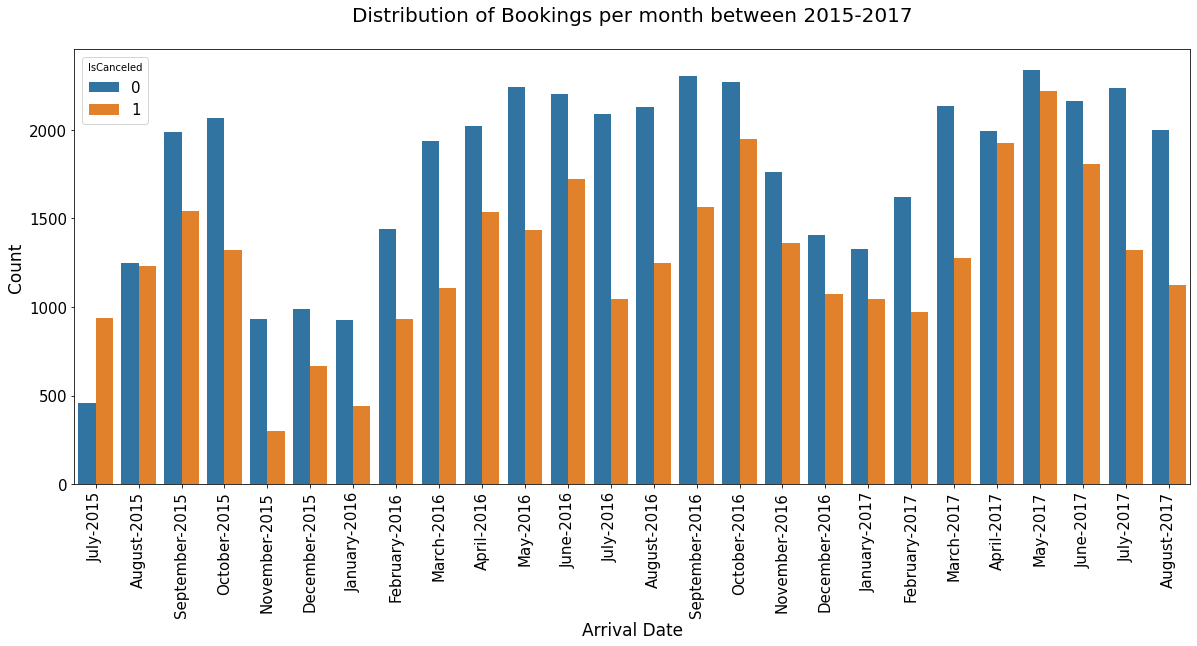

In [41]:
fig = plt.figure(figsize=(20, 8))

# count plot on single categorical variable
sns.countplot(x ='ArrivalDate',hue = 'IsCanceled', data = data)
 
plt.title ('Distribution of Bookings per month between 2015-2017', fontsize = 20, x = 0.5, y = 1.05)
plt.xticks(rotation = 90, fontsize = 15 )
plt.yticks(fontsize = 15)
plt.ylabel('Count', fontsize = 17)
plt.xlabel('Arrival Date', fontsize = 17)
plt.legend(title = 'IsCanceled', fontsize = 15)
plt.savefig('Distribution_Bookings_between_2015-2017.png', bbox_inches= 'tight' )

plt.show()

In [42]:
#Sorting the records by Year, Month and Day (Arrivals Date)
data['ArrivalDateMonthNumber'] = data['ArrivalDateMonth'].replace("January", "1").replace("February", "2").replace("March", "3").replace("April", "4").replace("May", "5").replace("June", "6").replace("July", "7").replace("August", "8").replace("September", "9").replace("October", "10").replace("November", "11").replace("December", "12")
df = data.groupby(['ArrivalDateYear', 'ArrivalDateMonthNumber','ArrivalDate', 'IsCanceled'])["LeadTime"].count()
df1 =  data.groupby('ArrivalDate')["ArrivalDateYear"].count()
proportion = df/df1 * 100

In [43]:
proportion = pd.DataFrame (proportion)
proportion.reset_index(inplace = True)
proportion.set_index (['ArrivalDate'], inplace = True)
proportion['ArrivalDateMonthNumber']= pd.to_numeric(proportion['ArrivalDateMonthNumber'])

In [44]:
#Sorting by arrival date
proportion = proportion.sort_values(by = ['ArrivalDateYear','ArrivalDateMonthNumber'], 
                                 ascending = [True, True])

In [45]:
#selecting only the cancellation proportion per month/year
proportion = proportion[proportion['IsCanceled'] == 1]
proportion.reset_index(inplace = True)

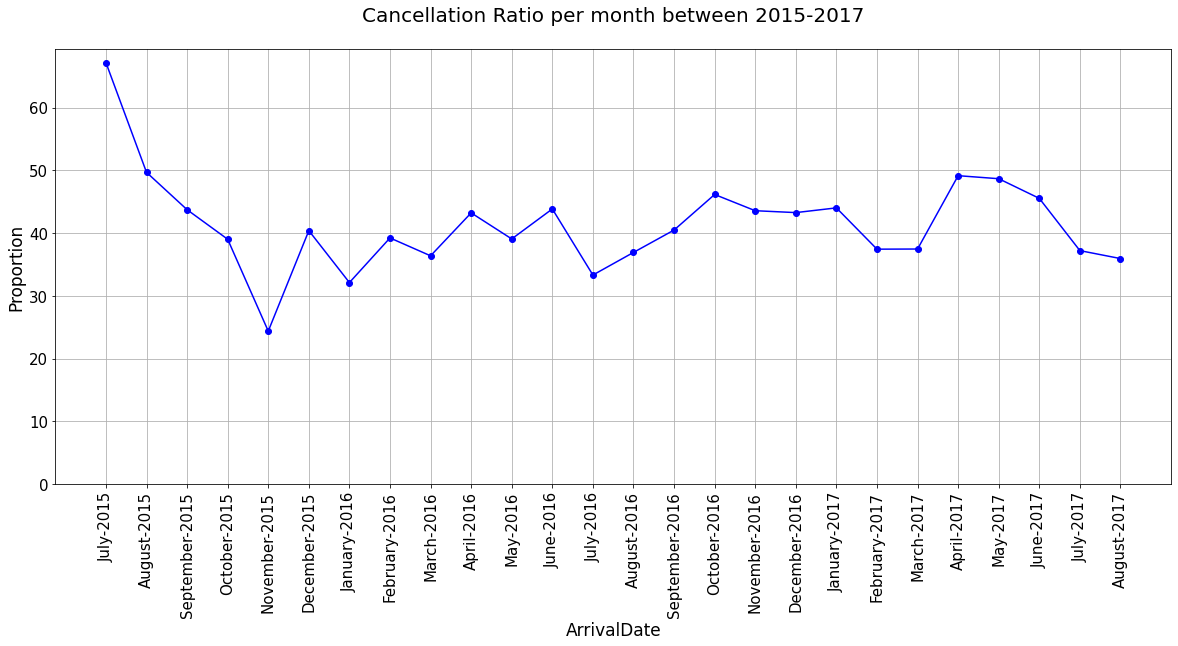

In [46]:
fig, ax = plt.subplots(figsize=(20, 8))

plt.plot(proportion['ArrivalDate'] , proportion[0], color='b', marker='o')
plt.title('Cancellation Ratio per month between 2015-2017', fontsize = 20, x = 0.5, y = 1.05)

plt.xlabel('ArrivalDate', fontsize = 17)
plt.ylabel('Proportion', fontsize = 17)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)

ax.set_ylim(ymin=0)

plt.grid(True)

plt.savefig('Cancellation_Ratio_2015-2017.png', bbox_inches= 'tight' )

plt.show()

In [47]:
data.drop(['ArrivalDate', 'ArrivalDateMonth'], axis = 1, inplace = True)
data['ArrivalDateMonthNumber']= pd.to_numeric(data['ArrivalDateMonthNumber'])

In [49]:
#defining categorical and numeric variables

num = ['LeadTime', 'ArrivalDateYear','ArrivalDateMonthNumber', 'ArrivalDateDayOfMonth', 'ArrivalDateWeekNumber', 'Adults', 'Children','Babies', 
       'StaysInWeekendNights','PreviousCancellations','PreviousBookingsNotCanceled',
       'StaysInWeekNights','BookingChanges','DaysInWaitingList','TotalOfSpecialRequests', 'RequiredCarParkingSpaces', 'ADR' ]

cat = data.columns.drop(num).to_list()
cat.remove('ReservationStatusDate') #it's not useful for predictions: doesn't have any relationship with target
cat.remove('IsCanceled')

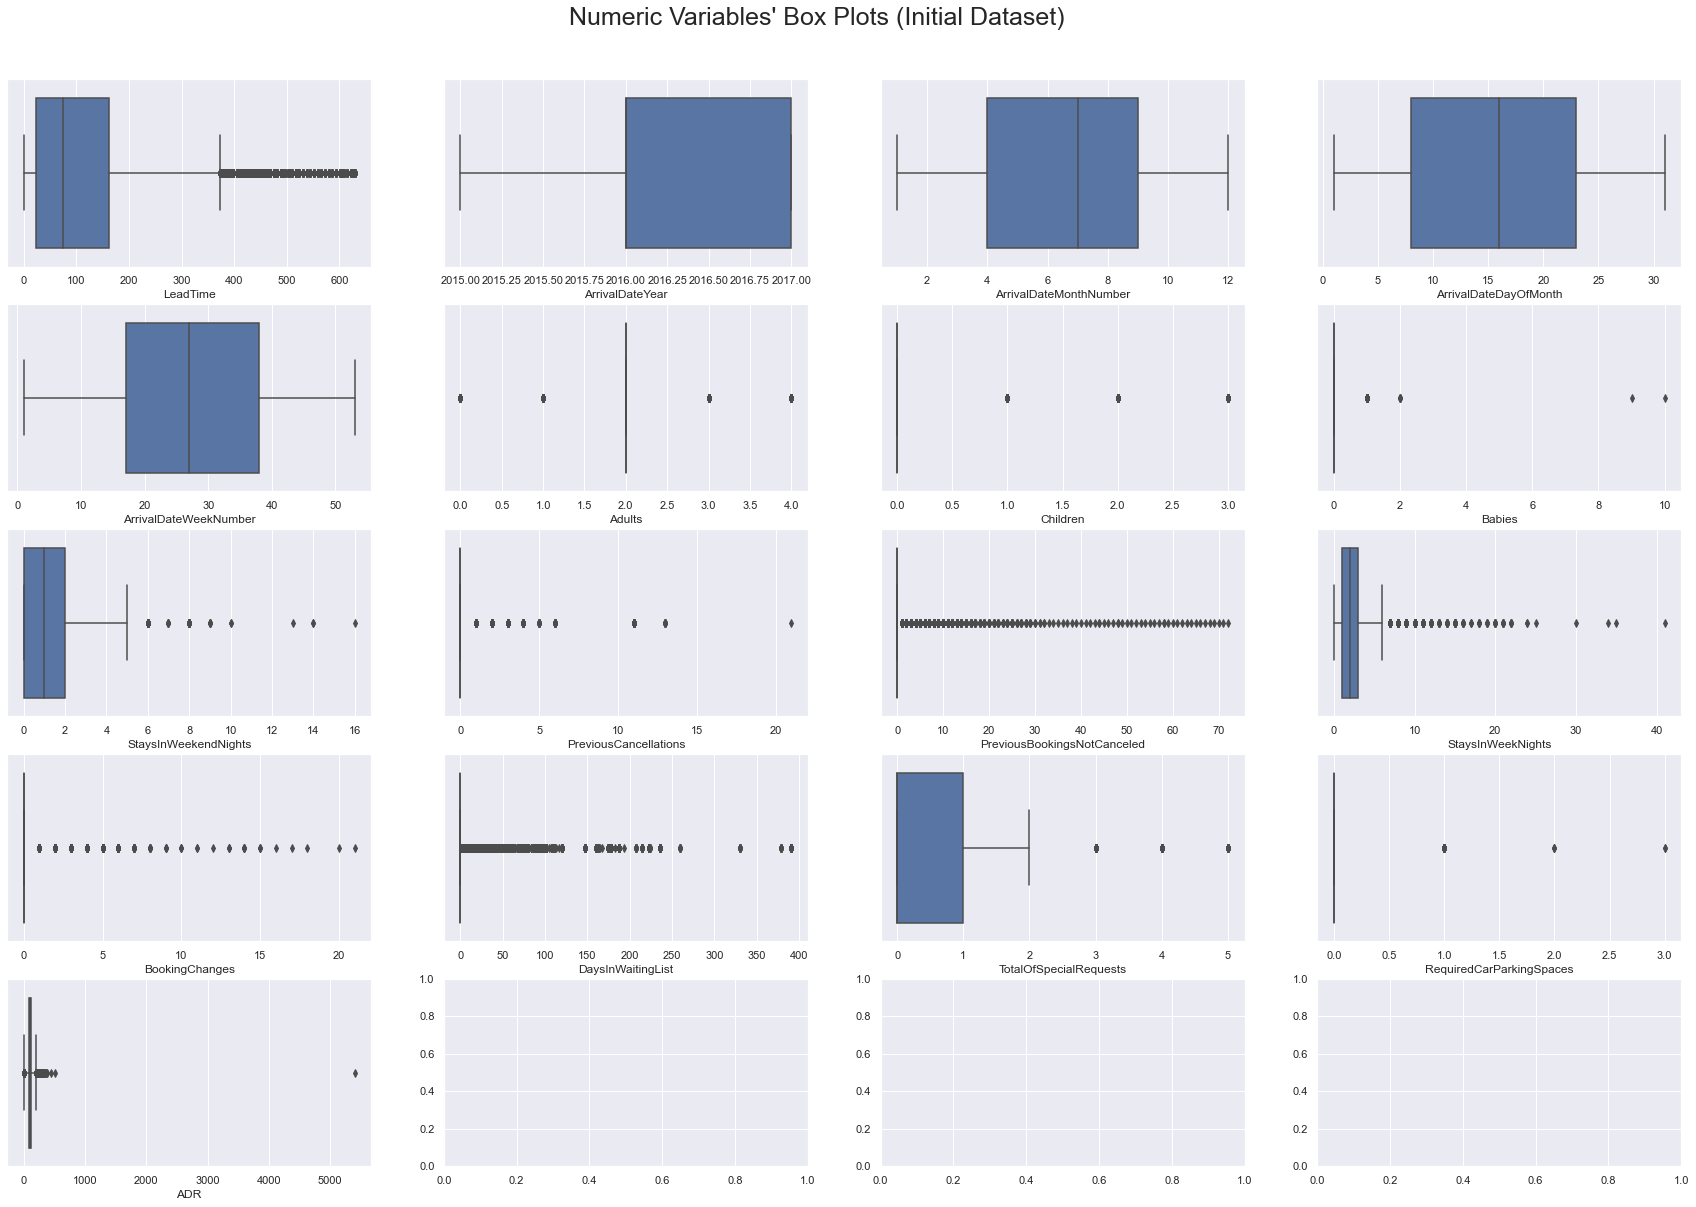

In [50]:
#Numeric Variables' Boxplots (initial dataset)
sns.set()
fig, axes = plt.subplots(5,4, figsize=(30, 20))

for ax, feat in zip(axes.flatten(), num):
    sns.boxplot(x=data[feat], ax=ax)
    
title = "Numeric Variables' Box Plots (Initial Dataset)"
plt.suptitle(title, x = 0.5, y = 0.93, fontsize = 25)
plt.show()

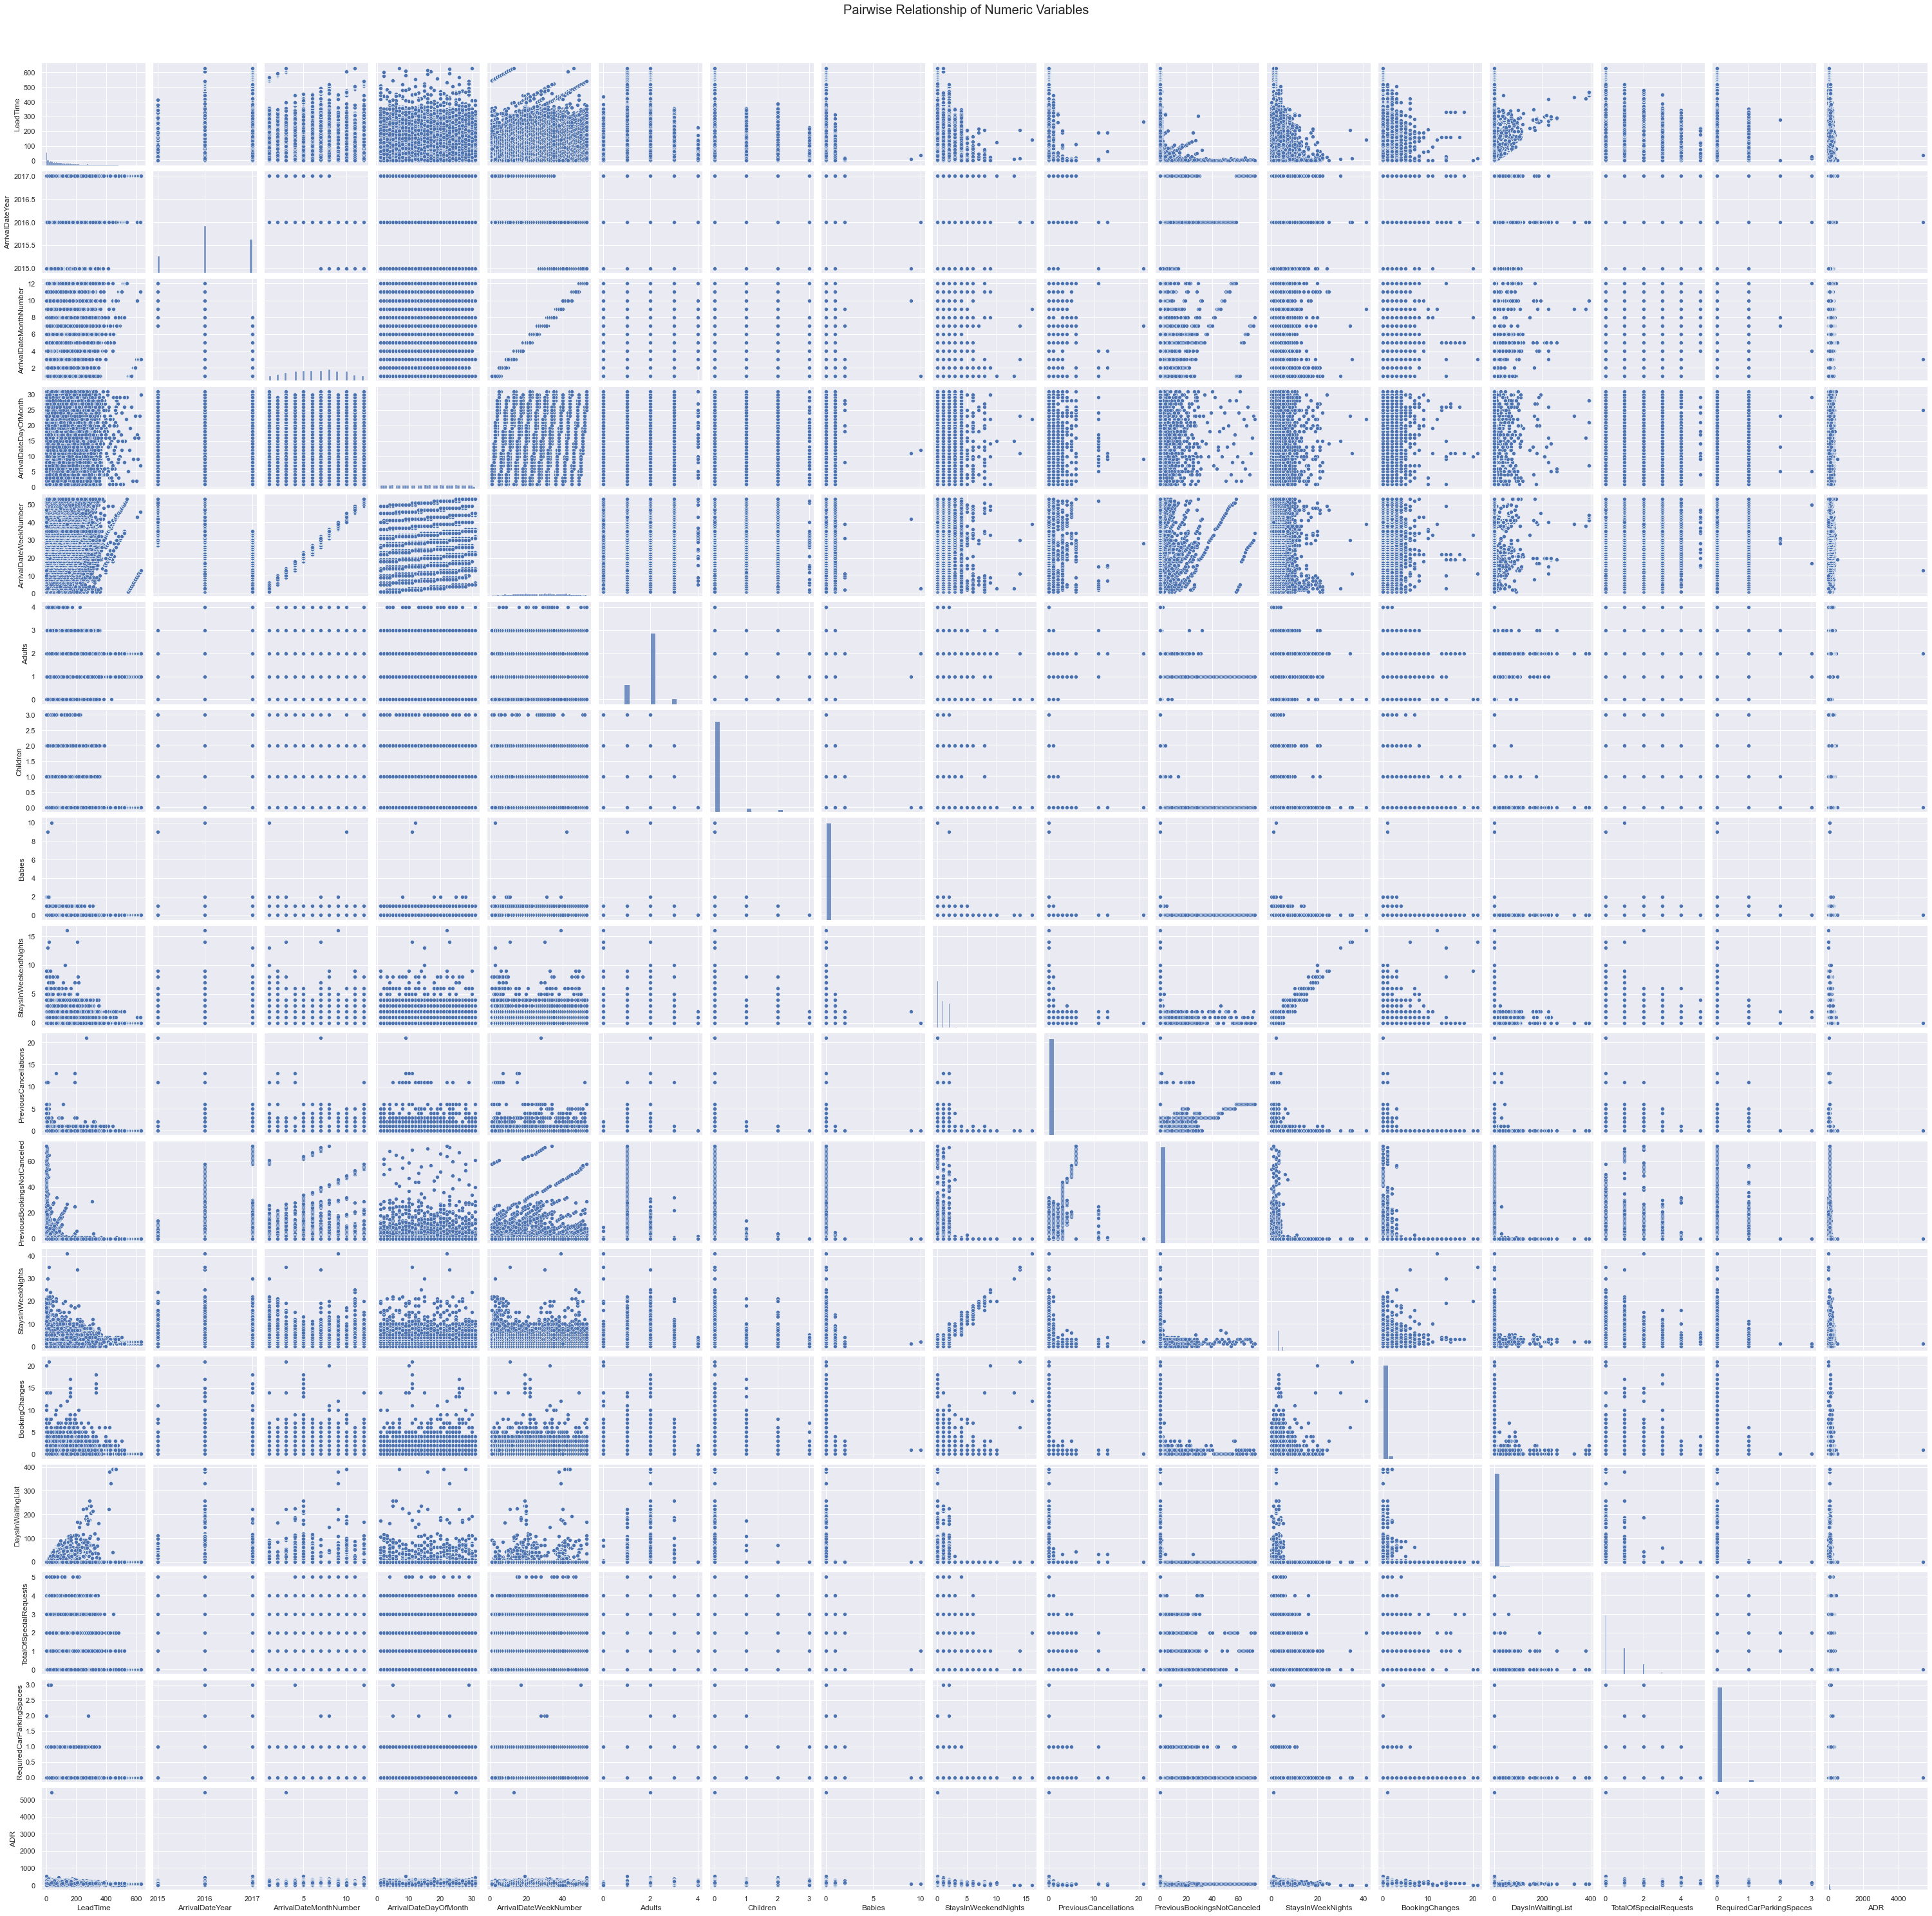

In [51]:
# pairplot of numeric features (initial dataset)
sns.pairplot(data[num], diag_kind="hist") 
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numeric Variables", fontsize=20)
plt.show()

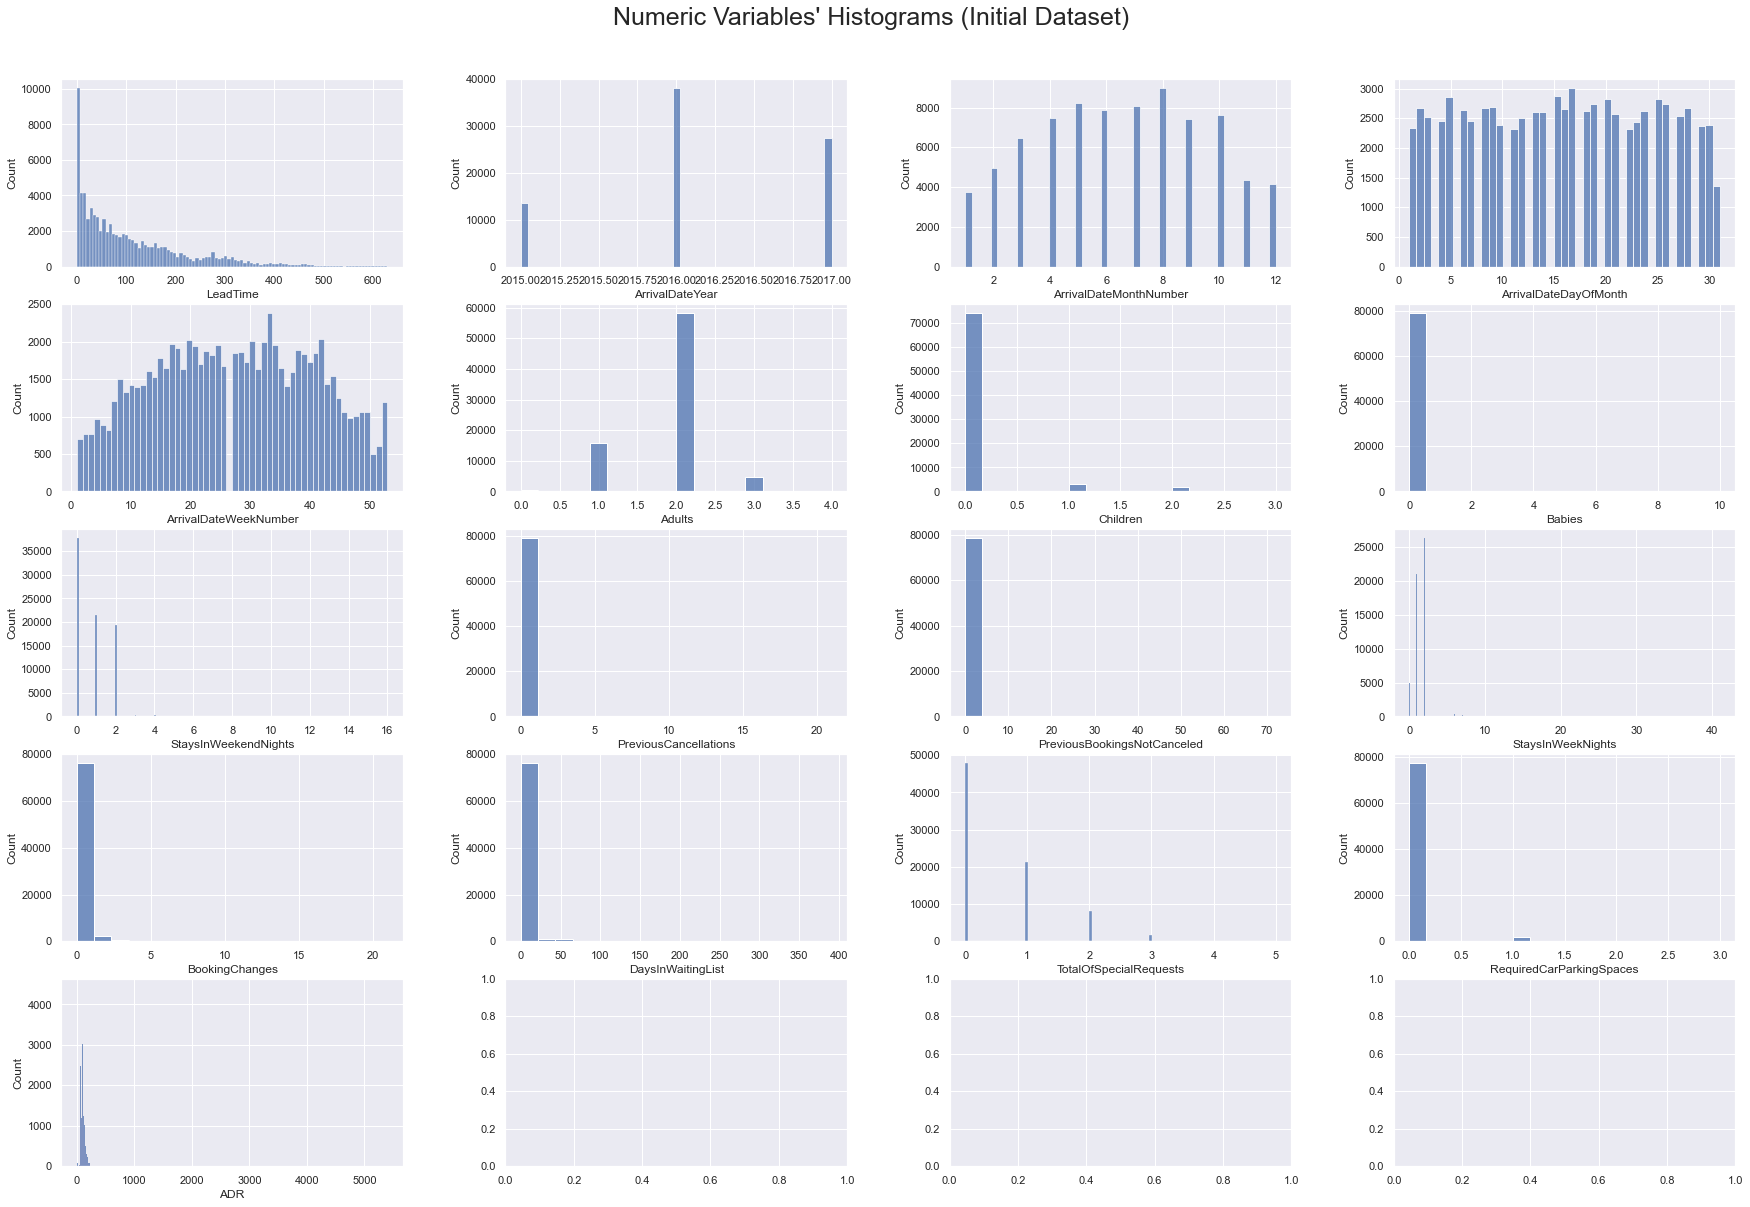

In [52]:
# All Numeric Variables' Histograms in one figure
sns. set ()

#Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots (5, 4, figsize=(30, 20))
                          
# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip (axes.flatten (), num):
    sns.histplot (x=data[feat], ax=ax)

# Layout

# Add a centered title to the figure:
title = "Numeric Variables' Histograms (Initial Dataset)"
plt.suptitle (title, x = 0.5, y = 0.93, fontsize = 25)
plt.subplots_adjust (wspace=0.3)
plt.show()

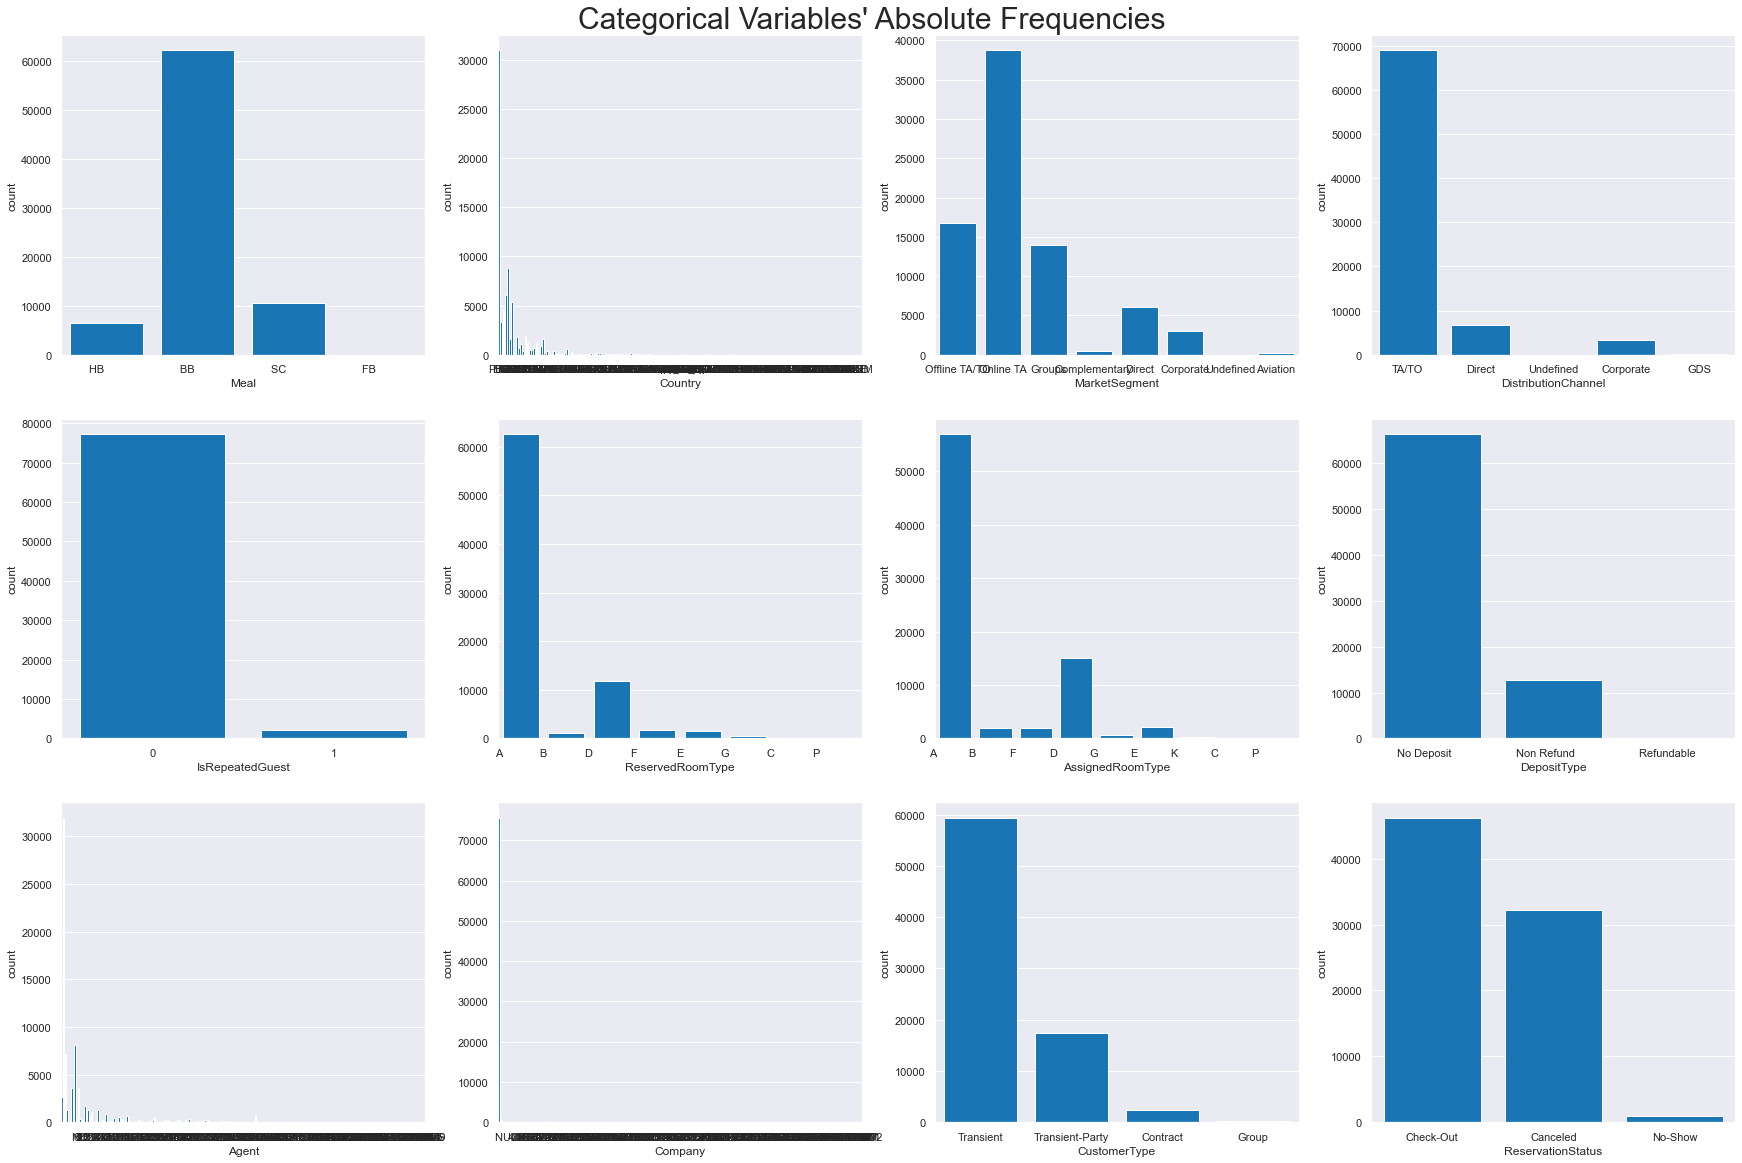

In [53]:
# categorical features' absolute frequencies
sns.set()
fig, axes = plt.subplots(3,4, figsize=(30, 20))

for ax, feat in zip(axes.flatten(), cat): 
    sns.countplot(x=data[feat], ax=ax, color='#007acc')

title = "Categorical Variables' Absolute Frequencies"
plt.suptitle(title,x = 0.5, y = 0.9, fontsize = 30)
plt.show()

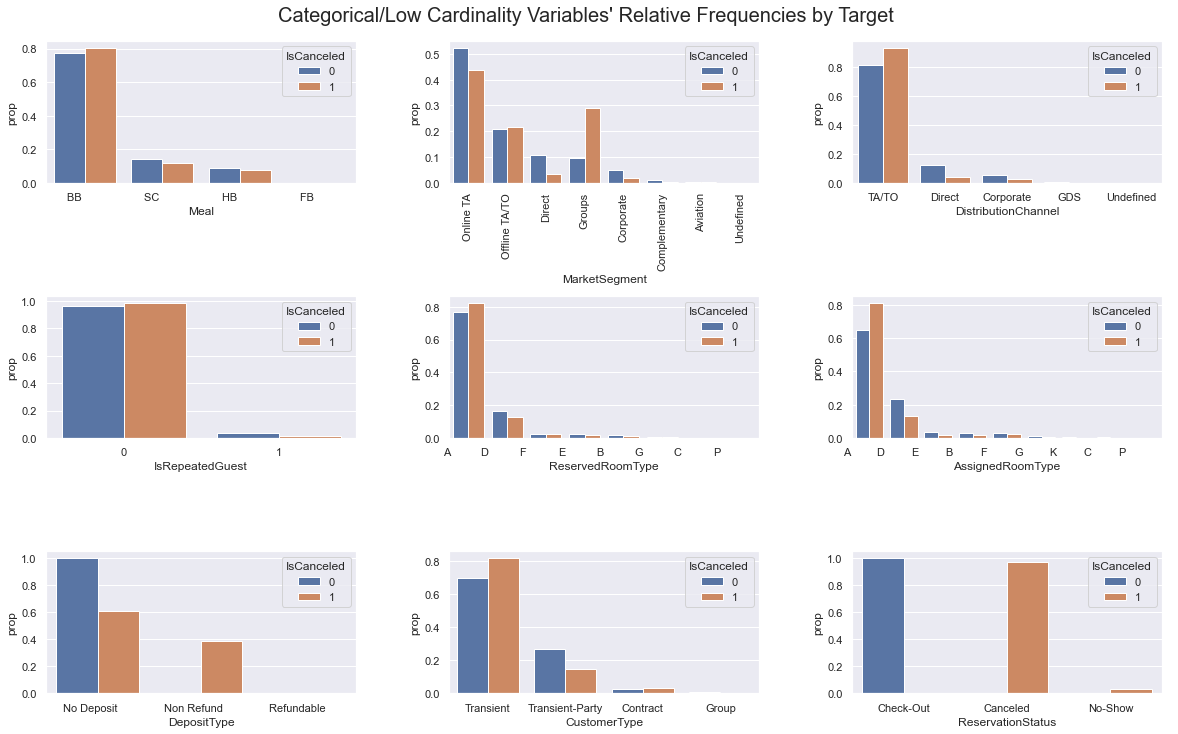

In [54]:
# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()

features = cat.copy()

#Remove high cardinality variables
features.remove('Country')
features.remove('Agent')
features.remove('Company')

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3,3, figsize=(20, 12))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    data1 = data.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data1, x=feat, y='prop', hue='IsCanceled',ax=ax)
    sns.move_legend(ax, "upper right")

title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title, x = 0.5, y = 0.92,fontsize = 20)
# Rotating X-axis labels 
axes.flatten()[1].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.8)

plt.show()

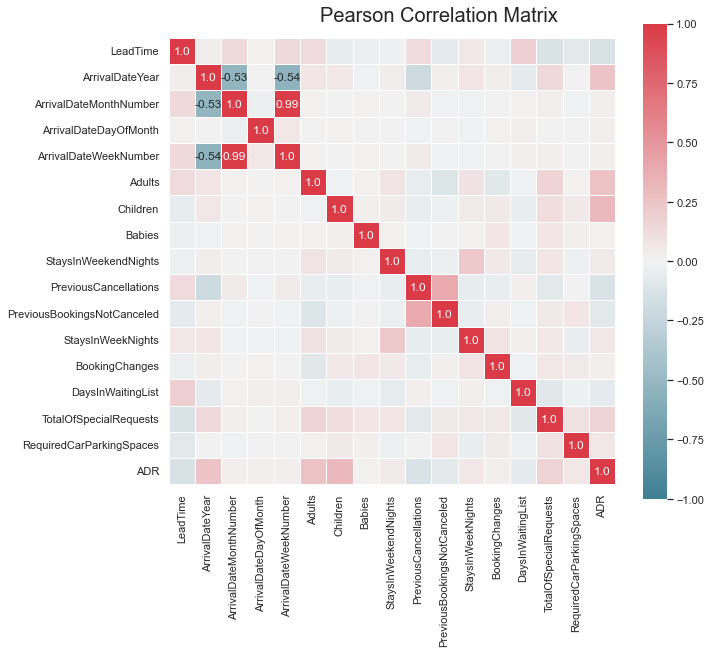

In [55]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[num].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

In [121]:
countries = data.groupby(['Country'])['LeadTime'].count()
countries = pd.DataFrame(countries)
countries.reset_index(inplace = True)
countries.rename (columns={'LeadTime': 'NumberBookings'}, inplace = True)
countries = countries.sort_values('NumberBookings', ascending = False ).head(10)

In [130]:
countries

Country  NumberBookings
125     PRT           30960
50      FRA            8804
39      DEU            6084
53      GBR            5315
46      ESP            4611
75      ITA            3307
14      BEL            1894
23      BRA            1794
158     USA            1618
115     NLD            1590

In [146]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']


fig = px.treemap(countries, path=['Country'], values=countries['NumberBookings'], width=800, height=400,
                title = "Top10 guests' nationalities",
                color=None, hover_data = countries,
                 color_continuous_scale= None
                )

fig.update_layout( 
    margin = dict(t=50, l=25, r=25, b=25))

fig.show('notebook')


In [149]:
#Get the number of customers by country 
country_customers = data['Country'].value_counts()

#Using plotly to show customers in world map
fig = go.Figure(data=go.Choropleth(
    locations = country_customers.index, #Define the country
    z = country_customers.values, #Define the values to each country
    colorscale = 'magma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Bookings',
))

layout = fig.update_layout(
    title_text='Density of Bookings By Country',
    
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular'
    ),

)

fig_choroplethmap = go.Figure(fig, layout)
fig_choroplethmap_= fig_choroplethmap.show(renderer='browser') #plot in browser to better visualization

### Final Conclusions: 
  * We can see some patterns in bookings' distribution across time - we have evidence of seasonality 
  * 'ADR' and 'Babies' variables with some outliers
  * Categorical Variables with high cardinality: Agent, Country, Company
  * High Correlated Variables: ArrivalDateMonthNumber and ArrivalDateWeekNumber
  


# Data Preparation <a name="DataPreparation"></a>
> The Data Preparation phase includes all of the tasks to prepare the dataset that are going to be applied in the next step. Some of the tasks are: outliers' removal, variables' scaling, missing values' imputation and feature engineering

In [74]:
data2 = data.copy()

## Duplicated entries <a name="duplicatedentries"></a>

In [75]:
#remove the duplicated entries
data2.drop_duplicates(keep = 'first', inplace = True)
data2.loc[data2.duplicated(keep = 'first'), :]

Empty DataFrame
Columns: [IsCanceled, LeadTime, ArrivalDateYear, ArrivalDateWeekNumber, ArrivalDateDayOfMonth, StaysInWeekendNights, StaysInWeekNights, Adults, Children, Babies, Meal, Country, MarketSegment, DistributionChannel, IsRepeatedGuest, PreviousCancellations, PreviousBookingsNotCanceled, ReservedRoomType, AssignedRoomType, BookingChanges, DepositType, Agent, Company, DaysInWaitingList, CustomerType, ADR, RequiredCarParkingSpaces, TotalOfSpecialRequests, ReservationStatus, ReservationStatusDate, ArrivalDateMonthNumber]
Index: []

[0 rows x 31 columns]

In [77]:
data2.reset_index(inplace = True)
data2.drop('index', axis = 1, inplace = True)

In [78]:
data2

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateWeekNumber  \
0               0         6             2015                     27   
1               1        88             2015                     27   
2               1        65             2015                     27   
3               1        92             2015                     27   
4               1       100             2015                     27   
...           ...       ...              ...                    ...   
53423           0        23             2017                     35   
53424           0       102             2017                     35   
53425           0        34             2017                     35   
53426           0       109             2017                     35   
53427           0       205             2017                     35   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
0                          1                     0                  2       1   
1                          1                     0                  4       2   
2                          1                     0                  4       1   
3                          1                     2                  4       2   
4                          2                     0                  2       2   
...                      ...                   ...                ...     ...   
53423                     30                     2                  5       2   
53424                     31                     2                  5       3   
53425                     31                     2                  5       2   
53426                     31                     2                  5       2   
53427                     29                     2                  7       2   

       Children  Babies  ...        Agent      Company DaysInWaitingList  \
0           0.0       0  ...            6         NULL                 0   
1           0.0       0  ...            9         NULL                 0   
2           0.0       0  ...            9         NULL                 0   
3           0.0       0  ...            9         NULL                 0   
4           0.0       0  ...            9         NULL                 0   
...         ...     ...  ...          ...          ...               ...   
53423       0.0       0  ...          394         NULL                 0   
53424       0.0       0  ...            9         NULL                 0   
53425       0.0       0  ...            9         NULL                 0   
53426       0.0       0  ...           89         NULL                 0   
53427       0.0       0  ...            9         NULL                 0   

      CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests  \
0        Transient    0.00                         0                       0   
1        Transient   76.50                         0                       1   
2        Transient   68.00                         0                       1   
3        Transient   76.50                         0                       2   
4        Transient   76.50                         0                       1   
...            ...     ...                       ...                     ...   
53423    Transient   96.14                         0                       0   
53424    Transient  225.43                         0                       2   
53425    Transient  157.71                         0                       4   
53426    Transient  104.40                         0                       0   
53427    Transient  151.20                         0                       2   

      ReservationStatus ReservationStatusDate  ArrivalDateMonthNumber  
0             Check-Out            2015-07-03                       7  
1              Canceled            2015-07-01                       7  
2              Canceled            2015-04-30                       7  
3              Canc

In [79]:
#we still need to remove these rows because they don't provide us any information (don't represent bookings)

data2[((data2['Adults'] == 0) & (data2['Children'] == 0) & (data2['Babies'] == 0)) == True]

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateWeekNumber  \
167             0       132             2015                     30   
433             0         0             2015                     33   
507             0         0             2015                     33   
541             0         0             2015                     33   
1401            1         1             2015                     37   
...           ...       ...              ...                    ...   
49760           0       107             2017                     26   
49812           0         1             2017                     26   
50746           0        44             2017                     28   
51002           0         2             2017                     28   
51465           0       170             2017                     30   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
167                       23                     2                  5       0   
433                        9                     2                  0       0   
507                       10                     9                 20       0   
541                       11                     0                  4       0   
1401                       6                     2                  0       0   
...                      ...                   ...                ...     ...   
49760                     27                     0                  3       0   
49812                     30                     0                  1       0   
50746                     15                     1                  1       0   
51002                     15                     2                  5       0   
51465                     27                     0                  2       0   

       Children  Babies  ...        Agent      Company DaysInWaitingList  \
167         0.0       0  ...            1         NULL                 0   
433         0.0       0  ...            9         NULL                 0   
507         0.0       0  ...         NULL           47                 0   
541         0.0       0  ...         NULL           49                 0   
1401        0.0       0  ...            1         NULL                 0   
...         ...     ...  ...          ...          ...               ...   
49760       0.0       0  ...            7         NULL                 0   
49812       0.0       0  ...         NULL         NULL                 0   
50746       0.0       0  ...          425         NULL                 0   
51002       0.0       0  ...            9         NULL                 0   
51465       0.0       0  ...           52         NULL                 0   

          CustomerType     ADR  RequiredCarParkingSpaces  \
167    Transient-Party    0.00                         0   
433           Contract    0.00                         0   
507          Transient    0.00                         0   
541    Transient-Party    0.00                         0   
1401   Transient-Party    0.00                         0   
...                ...     ...                       ...   
49760        Transient  100.80                         0   
49812        Transient    0.00                         1   
50746        Transient   73.80                         0   
51002  Transient-Party   22.86                         0   
51465        Transient    0.00                         0   

       TotalOfSpecialRequests ReservationStatus ReservationStatusDate  \
167                         0         Check-Out            2015-07-30   
433                         0         Check-Out            2015-08-11   
507                         0         Check-Out            2015-09-08   
541                         1         Check-Out            2015-08-15   
1401                        0          Canceled            2015-09-05   
...                       ...               ...                   ...   
49760                       0       

In [80]:
bookings = data2.drop(data2.index[((data2['Adults'] == 0) & (data2['Children'] == 0) & (data2['Babies'] == 0)) == True].tolist())

In [81]:
bookings.reset_index(inplace = True)
bookings.drop('index', axis = 1, inplace = True)

In [82]:
bookings 

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateWeekNumber  \
0               0         6             2015                     27   
1               1        88             2015                     27   
2               1        65             2015                     27   
3               1        92             2015                     27   
4               1       100             2015                     27   
...           ...       ...              ...                    ...   
53269           0        23             2017                     35   
53270           0       102             2017                     35   
53271           0        34             2017                     35   
53272           0       109             2017                     35   
53273           0       205             2017                     35   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
0                          1                     0                  2       1   
1                          1                     0                  4       2   
2                          1                     0                  4       1   
3                          1                     2                  4       2   
4                          2                     0                  2       2   
...                      ...                   ...                ...     ...   
53269                     30                     2                  5       2   
53270                     31                     2                  5       3   
53271                     31                     2                  5       2   
53272                     31                     2                  5       2   
53273                     29                     2                  7       2   

       Children  Babies  ...        Agent      Company DaysInWaitingList  \
0           0.0       0  ...            6         NULL                 0   
1           0.0       0  ...            9         NULL                 0   
2           0.0       0  ...            9         NULL                 0   
3           0.0       0  ...            9         NULL                 0   
4           0.0       0  ...            9         NULL                 0   
...         ...     ...  ...          ...          ...               ...   
53269       0.0       0  ...          394         NULL                 0   
53270       0.0       0  ...            9         NULL                 0   
53271       0.0       0  ...            9         NULL                 0   
53272       0.0       0  ...           89         NULL                 0   
53273       0.0       0  ...            9         NULL                 0   

      CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests  \
0        Transient    0.00                         0                       0   
1        Transient   76.50                         0                       1   
2        Transient   68.00                         0                       1   
3        Transient   76.50                         0                       2   
4        Transient   76.50                         0                       1   
...            ...     ...                       ...                     ...   
53269    Transient   96.14                         0                       0   
53270    Transient  225.43                         0                       2   
53271    Transient  157.71                         0                       4   
53272    Transient  104.40                         0                       0   
53273    Transient  151.20                         0                       2   

      ReservationStatus ReservationStatusDate  ArrivalDateMonthNumber  
0             Check-Out            2015-07-03                       7  
1              Canceled            2015-07-01                       7  
2              Canceled            2015-04-30                       7  
3              Canc

## Missing values <a name="missingvalues"></a>

In [83]:
bookings1 = bookings.copy()

In [84]:
bookings1.median(numeric_only=True)

IsCanceled                        0.0
LeadTime                         51.0
ArrivalDateYear                2016.0
ArrivalDateWeekNumber            27.0
ArrivalDateDayOfMonth            16.0
StaysInWeekendNights              1.0
StaysInWeekNights                 2.0
Adults                            2.0
Children                          0.0
Babies                            0.0
IsRepeatedGuest                   0.0
PreviousCancellations             0.0
PreviousBookingsNotCanceled       0.0
BookingChanges                    0.0
DaysInWaitingList                 0.0
ADR                             105.3
RequiredCarParkingSpaces          0.0
TotalOfSpecialRequests            1.0
ArrivalDateMonthNumber            7.0
dtype: float64

In [85]:
modes = bookings1[cat].mode().loc[0]
modes

Meal                          BB       
Country                             PRT
MarketSegment                 Online TA
DistributionChannel               TA/TO
IsRepeatedGuest                       0
ReservedRoomType       A               
AssignedRoomType       A               
DepositType             No Deposit     
Agent                                 9
Company                            NULL
CustomerType                  Transient
ReservationStatus             Check-Out
Name: 0, dtype: object

In [86]:
bookings1.fillna(bookings1.median(), inplace=True)
bookings1.fillna(modes, inplace=True)
bookings1.isna().sum()  # checking how many NaNs we still have

C:\Users\andre\AppData\Local\Temp/ipykernel_103112/3582061376.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
ArrivalDat

In [87]:
# change data types of some variables
bookings1['Children'] = bookings1['Children'].astype(int)

In [88]:
bookings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53274 entries, 0 to 53273
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   53274 non-null  int64  
 1   LeadTime                     53274 non-null  int64  
 2   ArrivalDateYear              53274 non-null  int64  
 3   ArrivalDateWeekNumber        53274 non-null  int64  
 4   ArrivalDateDayOfMonth        53274 non-null  int64  
 5   StaysInWeekendNights         53274 non-null  int64  
 6   StaysInWeekNights            53274 non-null  int64  
 7   Adults                       53274 non-null  int64  
 8   Children                     53274 non-null  int32  
 9   Babies                       53274 non-null  int64  
 10  Meal                         53274 non-null  object 
 11  Country                      53274 non-null  object 
 12  MarketSegment                53274 non-null  object 
 13  DistributionChan

## Outliers' Removal <a name="outliersremoval"></a>

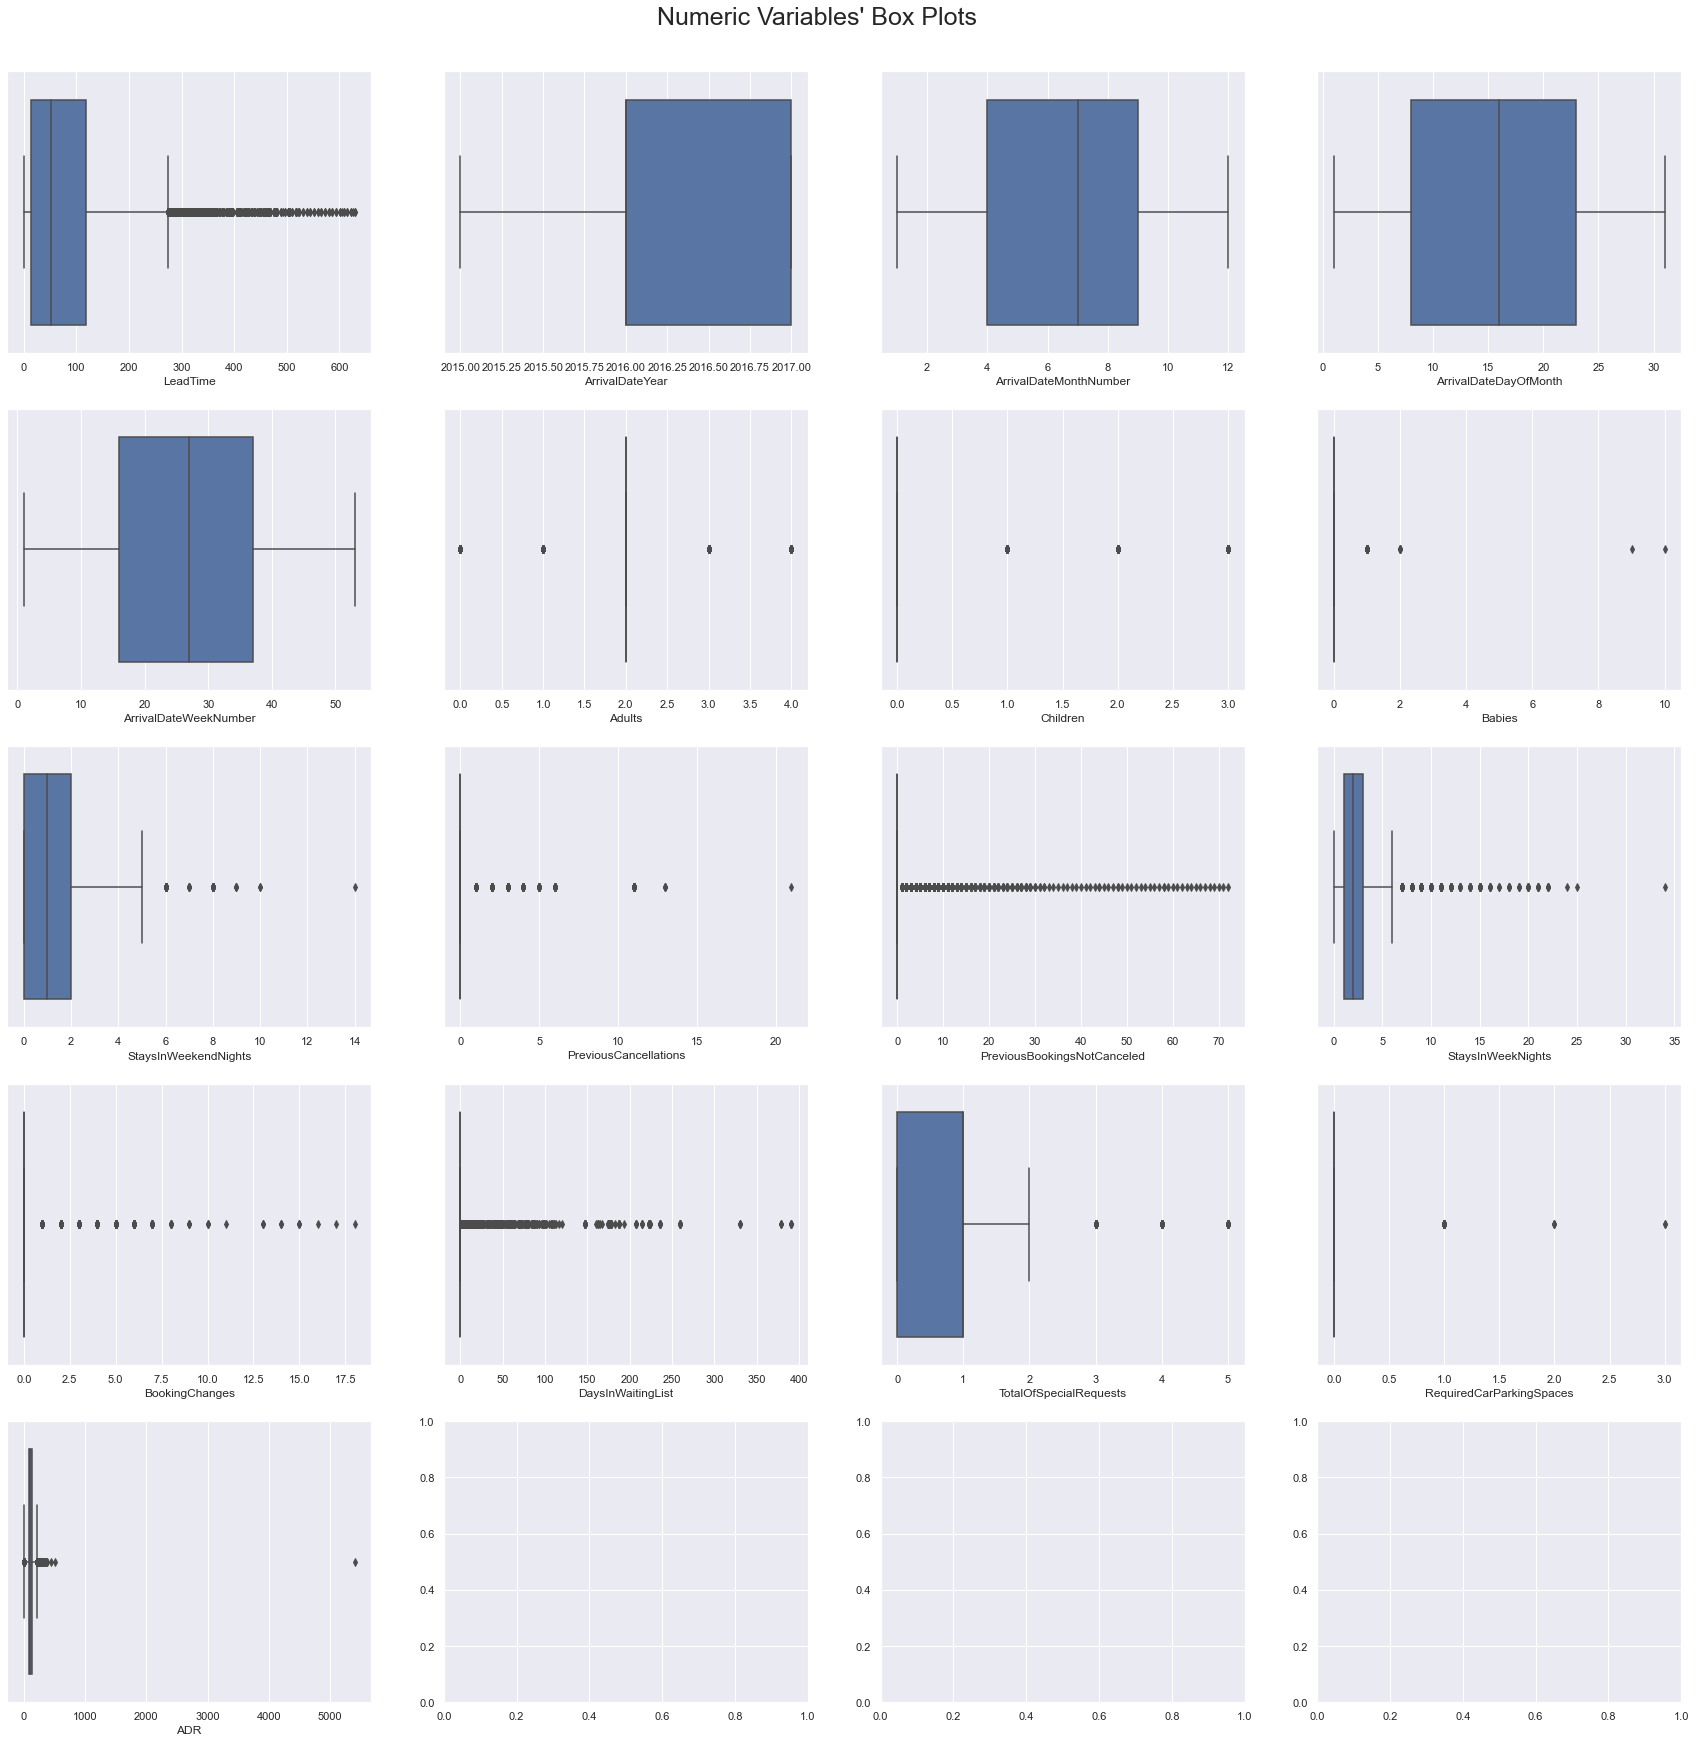

In [89]:
#Numeric Variables' Boxplots 
sns.set()
fig, axes = plt.subplots(5,4, figsize=(30, 30))

for ax, feat in zip(axes.flatten(), num):
    sns.boxplot(x=bookings1[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title, x = 0.5, y = 0.91, fontsize = 25)
plt.show()

In [90]:
bookings1[bookings1['ADR'] > 5000] #outlier

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateWeekNumber  \
4770           1        35             2016                     13   

      ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
4770                     25                     0                  1       2   

      Children  Babies  ...        Agent      Company DaysInWaitingList  \
4770         0       0  ...           12         NULL                 0   

     CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests  \
4770    Transient  5400.0                         0                       0   

     ReservationStatus ReservationStatusDate  ArrivalDateMonthNumber  
4770          Canceled            2016-02-19                       3  

[1 rows x 31 columns]

In [91]:
bookings1[bookings1['Babies'] > 4]

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateWeekNumber  \
3321            0        37             2016                      3   
20486           0        11             2015                     42   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
3321                      12                     0                  2       2   
20486                     11                     2                  1       1   

       Children  Babies  ...        Agent      Company DaysInWaitingList  \
3321          0      10  ...            9         NULL                 0   
20486         0       9  ...           95         NULL                 0   

          CustomerType    ADR  RequiredCarParkingSpaces  \
3321         Transient  84.45                         0   
20486  Transient-Party  95.00                         0   

       TotalOfSpecialRequests ReservationStatus ReservationStatusDate  \
3321                        1         Check-Out            2016-01-14   
20486                       0         Check-Out            2015-10-14   

       ArrivalDateMonthNumber  
3321                        1  
20486                      10  

[2 rows x 31 columns]

In [92]:
bookings1[(bookings1['Babies'] > 4) & (bookings1['Adults'] <= 2)] #outlier

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateWeekNumber  \
3321            0        37             2016                      3   
20486           0        11             2015                     42   

       ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  \
3321                      12                     0                  2       2   
20486                     11                     2                  1       1   

       Children  Babies  ...        Agent      Company DaysInWaitingList  \
3321          0      10  ...            9         NULL                 0   
20486         0       9  ...           95         NULL                 0   

          CustomerType    ADR  RequiredCarParkingSpaces  \
3321         Transient  84.45                         0   
20486  Transient-Party  95.00                         0   

       TotalOfSpecialRequests ReservationStatus ReservationStatusDate  \
3321                        1         Check-Out            2016-01-14   
20486                       0         Check-Out            2015-10-14   

       ArrivalDateMonthNumber  
3321                        1  
20486                      10  

[2 rows x 31 columns]

In [93]:
#Manual Filtering 

filters = ( 
    (bookings1['Babies']<4)
    &
    (bookings1['ADR']<5000) 
)

bookings_clean = bookings1[filters] 

print('Percentage of data kept:', np.round(bookings_clean.shape[0] / bookings1.shape[0], 4))

Percentage of data kept: 0.9999


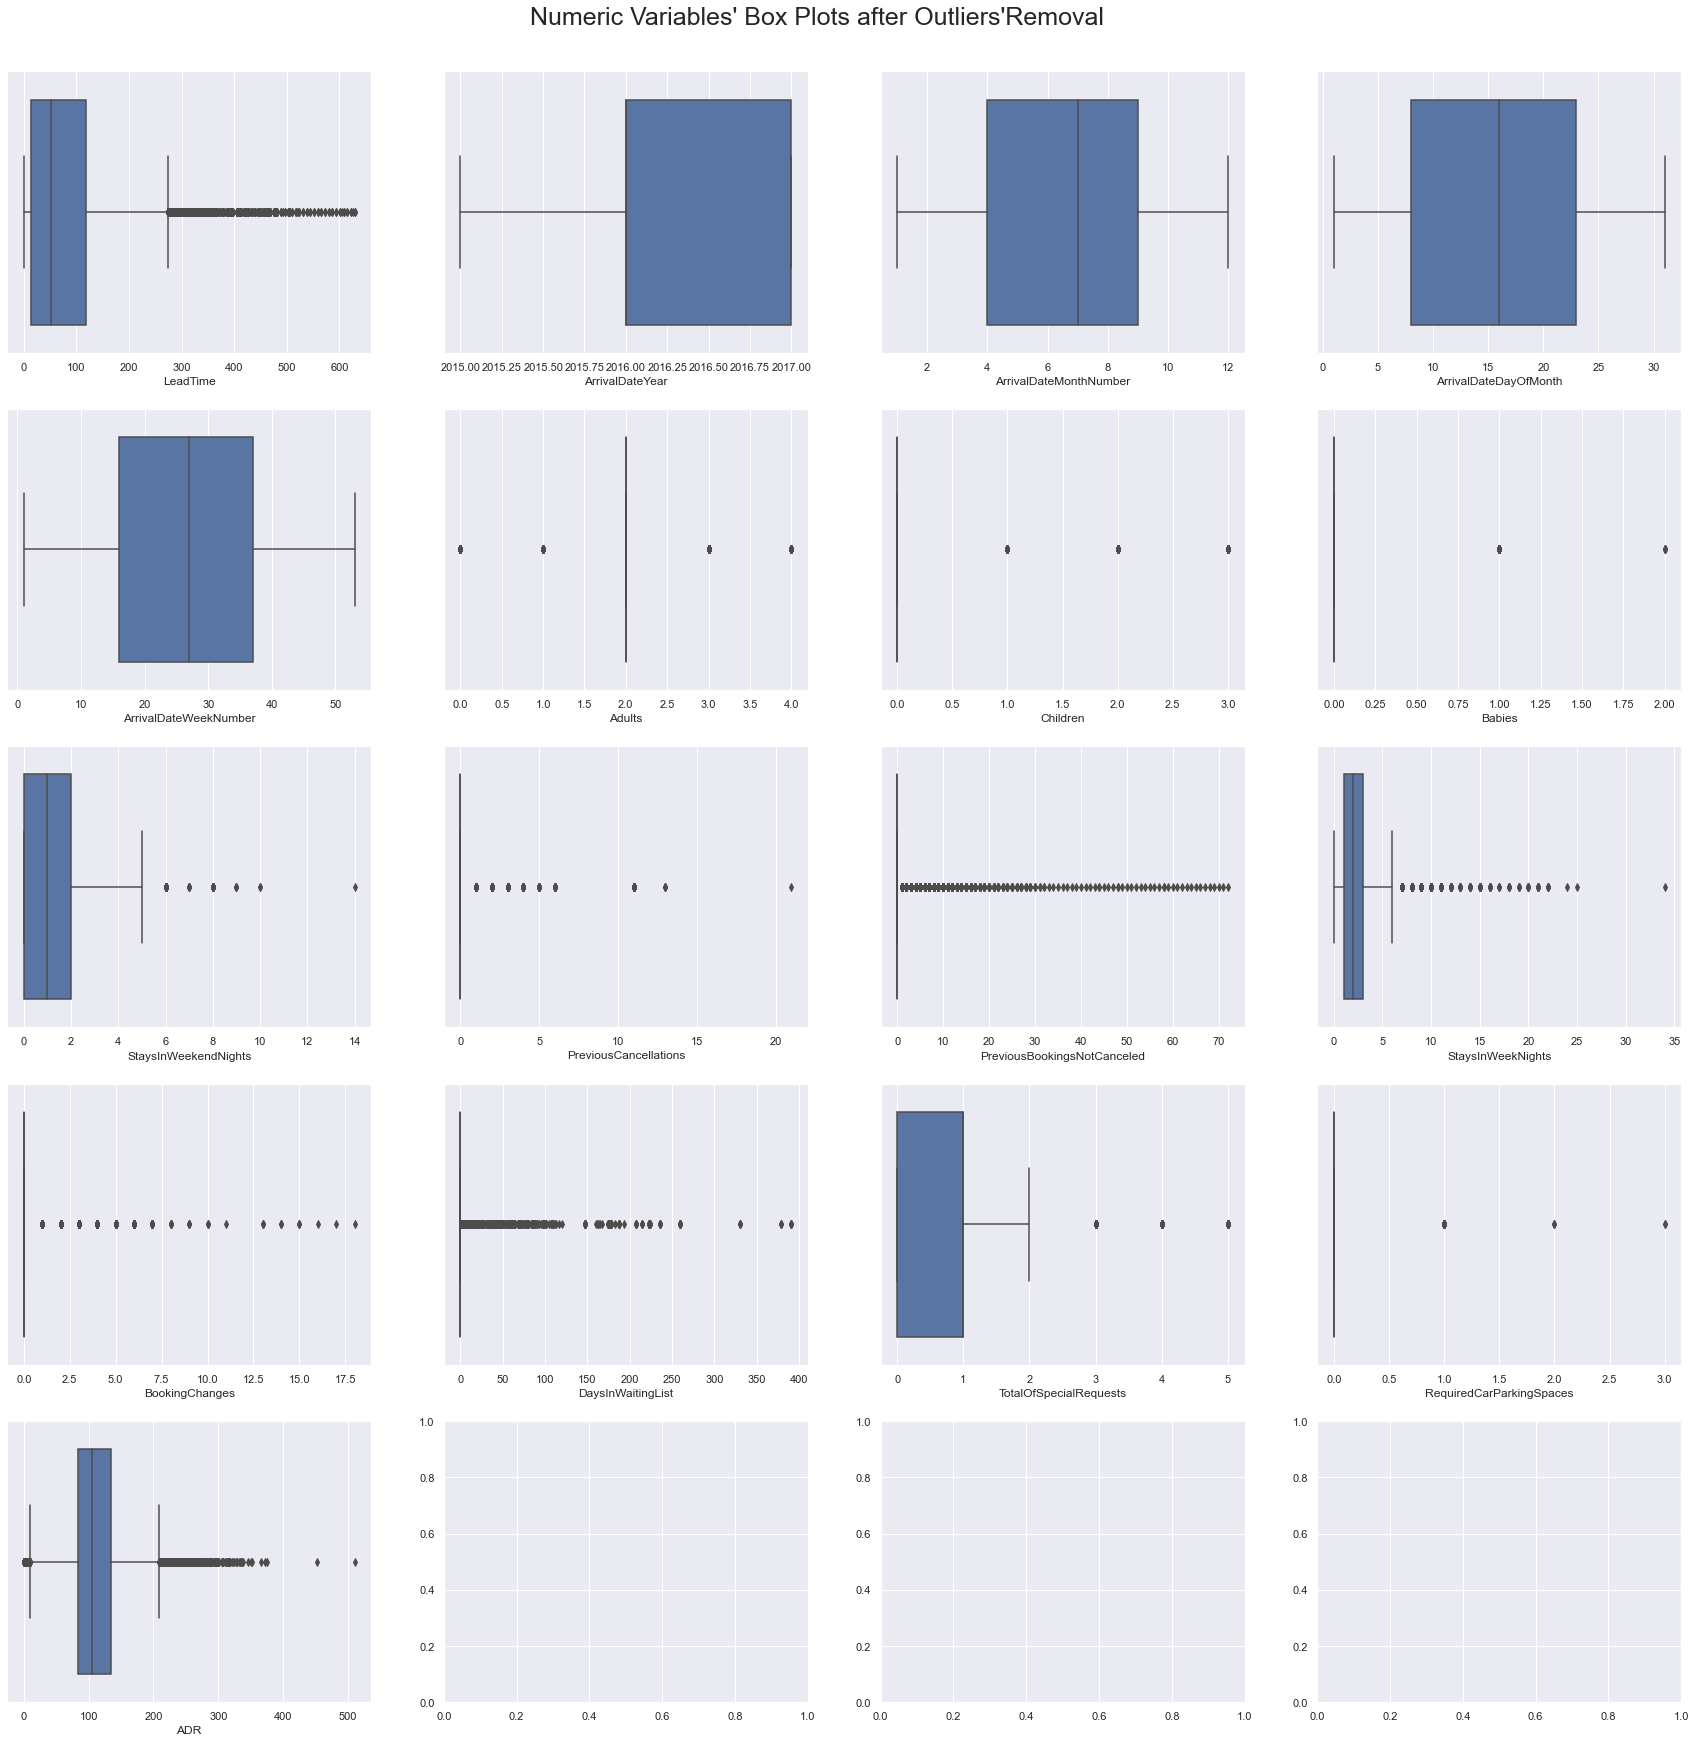

In [94]:
#Numeric Variables' Boxplots after Outliers' Removal
sns.set()
fig, axes = plt.subplots(5,4, figsize=(30, 30))

for ax, feat in zip(axes.flatten(), num):
    sns.boxplot(x=bookings_clean[feat], ax=ax)
    
title = "Numeric Variables' Box Plots after Outliers'Removal"
plt.suptitle(title, x = 0.5, y = 0.91, fontsize = 25)
plt.show()

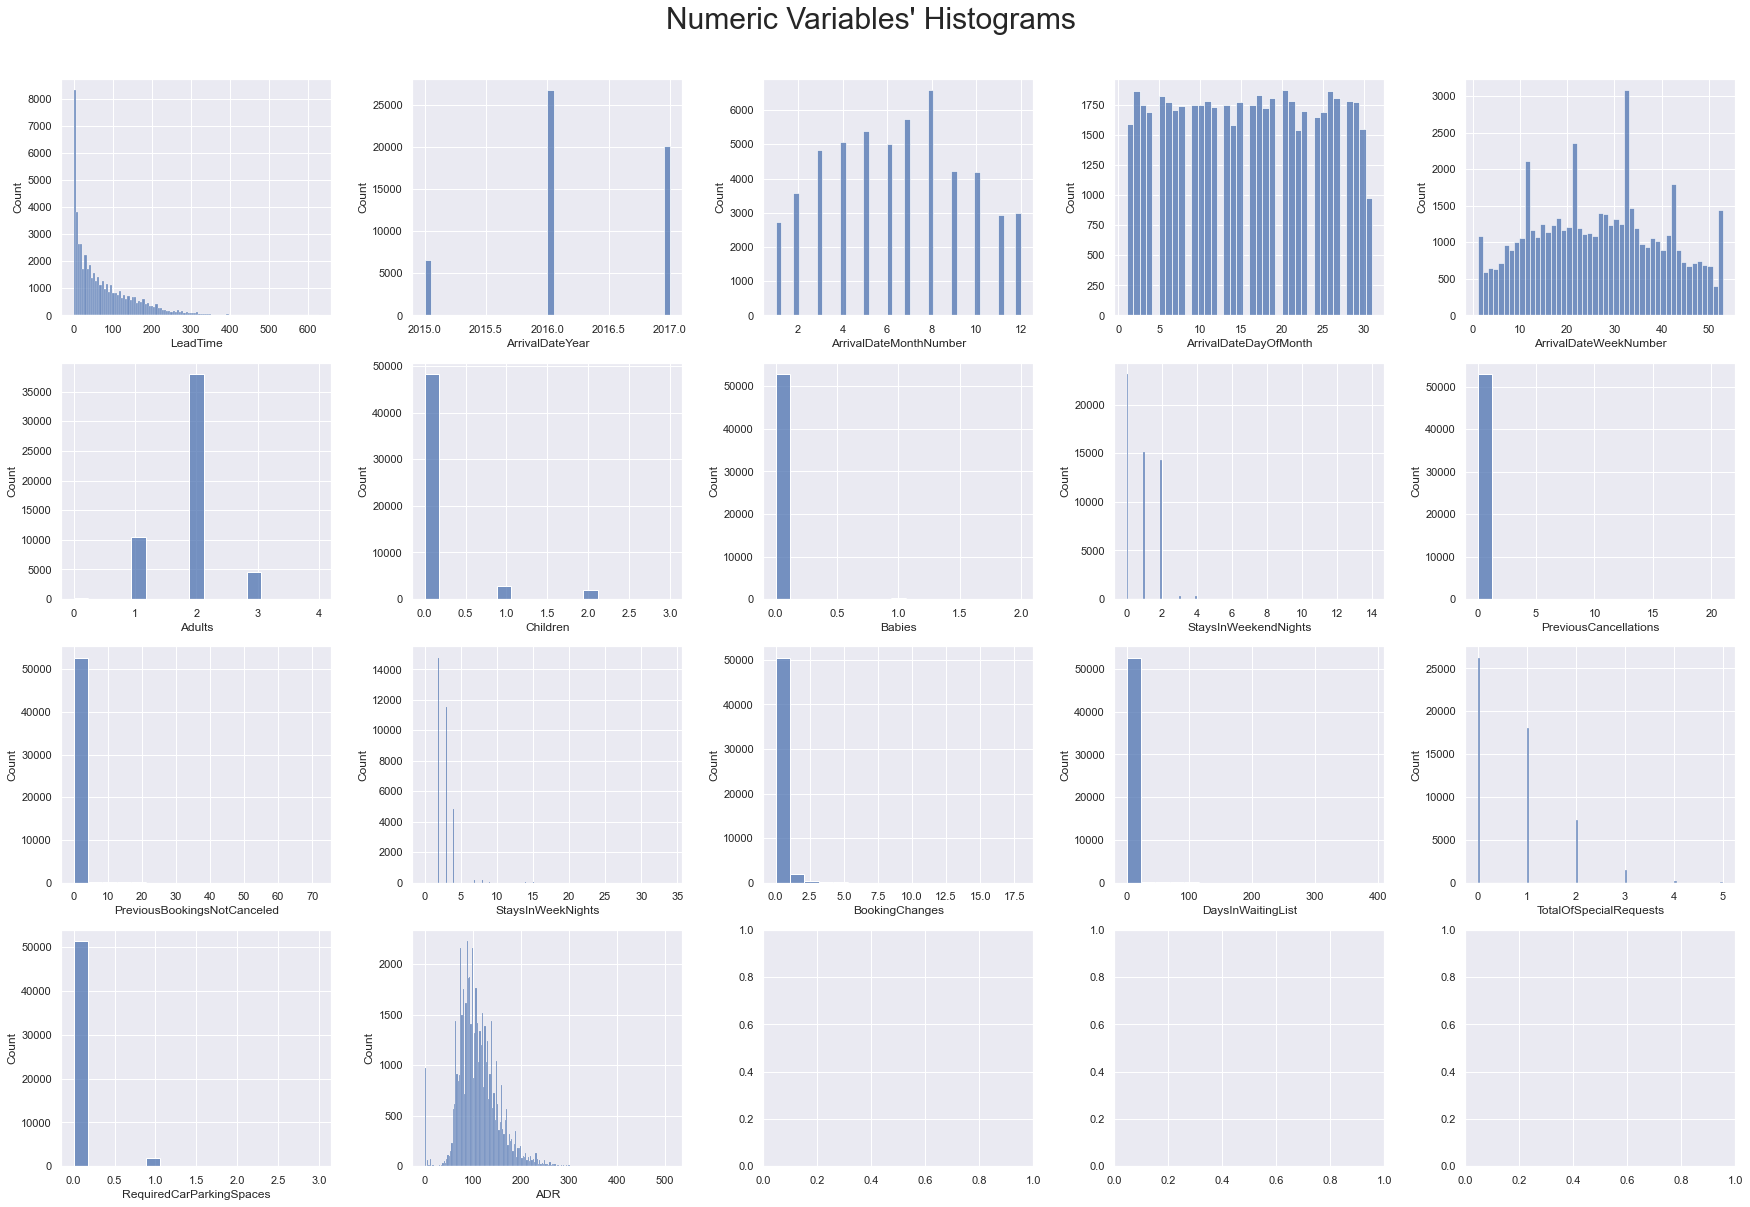

In [95]:
# All Numeric Variables' Histograms in one figure
sns. set ()

#Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots (4, 5, figsize=(30, 20))
                          
# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip (axes.flatten (), num):
    sns.histplot (x=bookings_clean[feat], ax=ax)

# Layout

# Add a centered title to the figure:
title = "Numeric Variables' Histograms"
plt.suptitle (title, x = 0.5, y = 0.93, fontsize = 30)
plt.subplots_adjust (wspace=0.3)

plt.show()

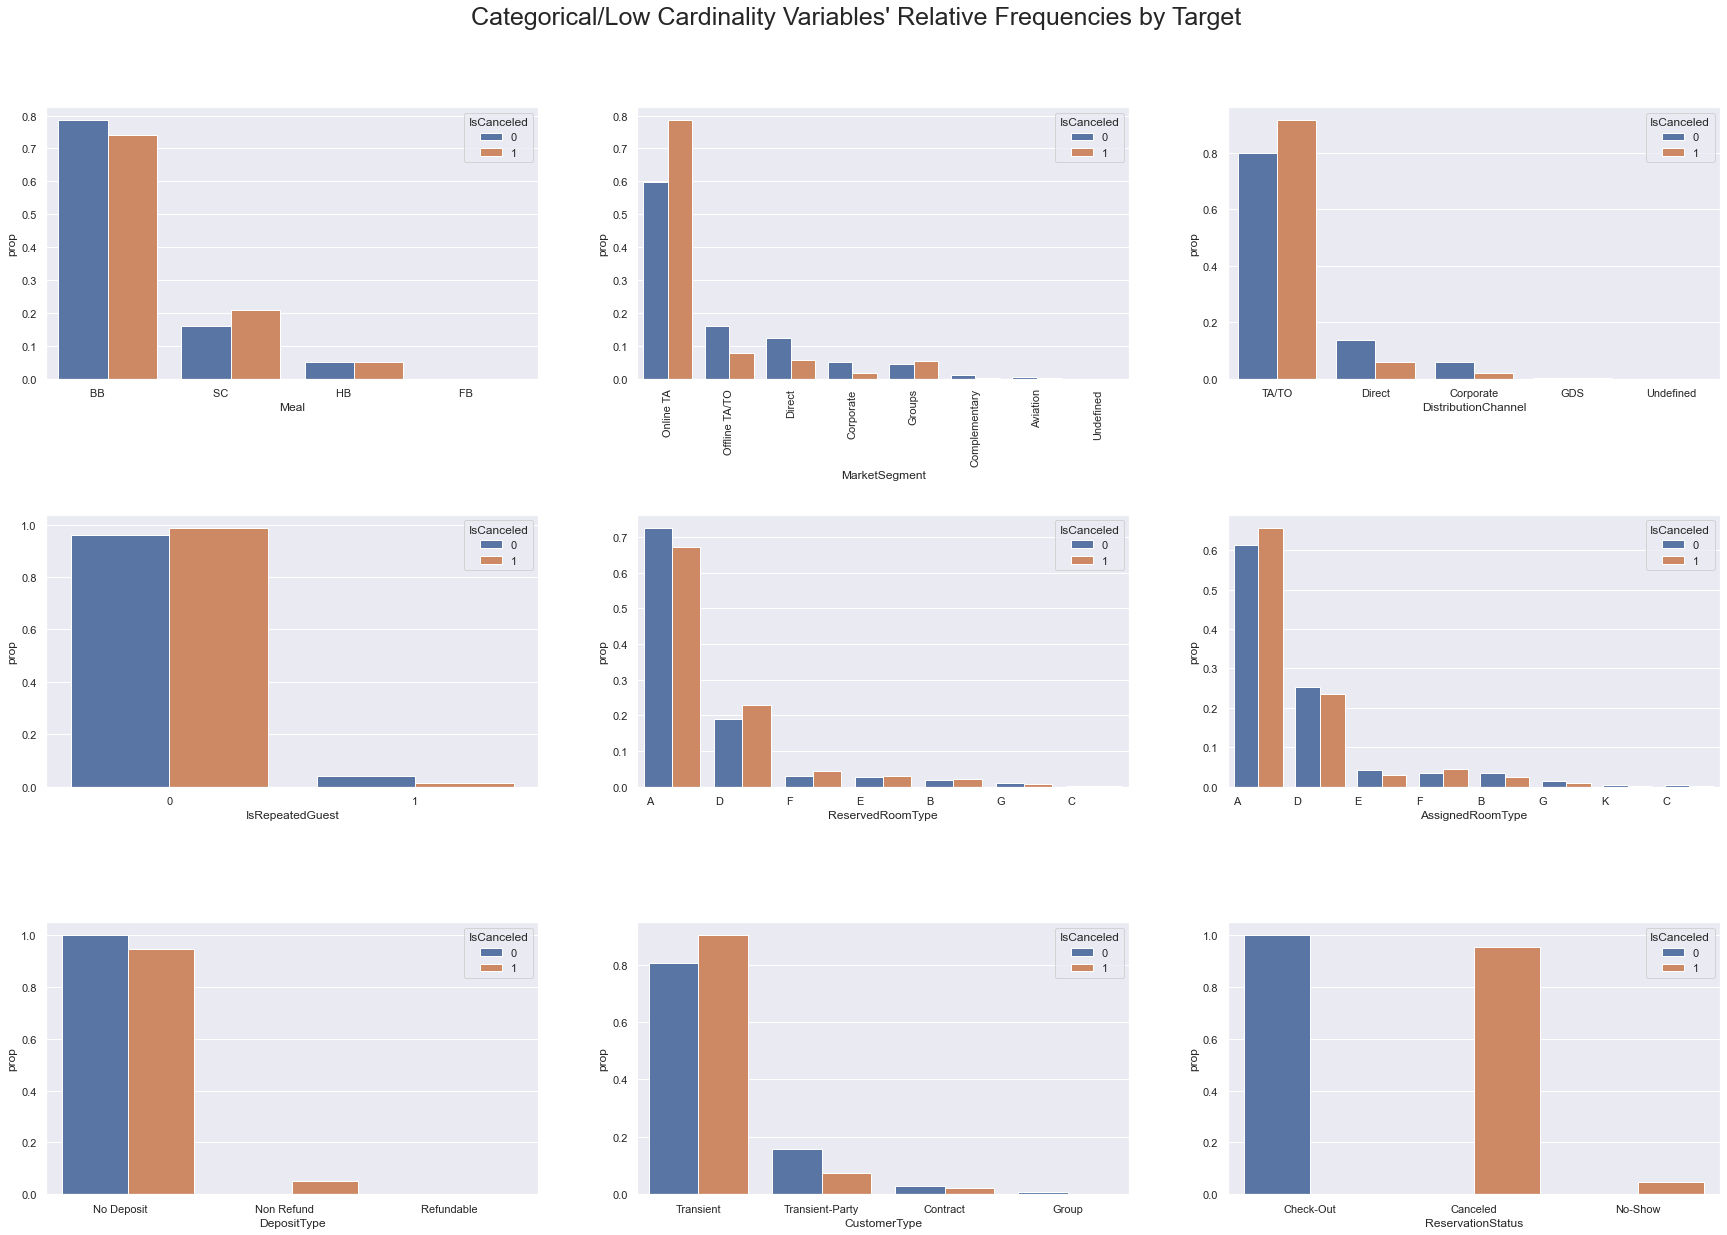

In [96]:
# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3,3, figsize=(30, 20))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    data1 = bookings_clean.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data1, x=feat, y='prop', hue='IsCanceled', ax=ax)
    sns.move_legend(ax, "upper right")

title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title, fontsize = 25, x = 0.5, y = 0.95)
# Rotating X-axis labels

axes.flatten()[1].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Feature Engineering<a name="featureengineering"></a>

In [97]:
bookings2 = bookings_clean.copy()

In [98]:
bookings2.reset_index(inplace = True)
bookings2.drop('index', axis = 1, inplace = True)

In [99]:
#creating "Kids" (numeric variable) which represents the sum of children and babies
bookings2['Kids'] = bookings2['Children'] + bookings2['Babies']
bookings2.drop(['Children','Babies'] , axis = 1, inplace = True)

In [100]:
#creating "RoomChange" (categorical variable) which is important to understand if the room that was reserved is the same
#as the one assigned to the booking
bookings2[['ReservedRoomType', 'AssignedRoomType', 'IsCanceled']].head()

ReservedRoomType  AssignedRoomType  IsCanceled
0  A                 A                          0
1  A                 A                          1
2  A                 A                          1
3  A                 A                          1
4  A                 A                          1

In [101]:
def roomchange_function (x, y):
    list1 = bookings2[x].tolist()
    list2 = bookings2[y].tolist()
    room_change = []
    for w,z in zip(list1, list2):
        if w == z: 
            result = 'No'
            room_change.append(result)
        else: 
            result = 'Yes'
            room_change.append(result)

    return room_change                

In [102]:
bookings2['RoomChange'] = roomchange_function ('ReservedRoomType', 'AssignedRoomType')

In [103]:
# aggregation of Country categories into top 10 + "Other": PRT, FRA, GBR, DEU, ESP, ITA, BEL, BRA, NLD, USA and Other
for i in [i for i in list(bookings2['Country'].unique()) if i not in ('PRT', 'FRA', 'GBR', 'DEU', 'ESP', 'ITA', 'BEL', 'BRA', 'NLD', 'USA')]:
    bookings2.loc[bookings2[bookings2['Country'] == i].index, 'Country'] = 'Other'    
bookings2['Country'].value_counts()

PRT      13125
Other    11224
FRA       7399
GBR       4519
DEU       4465
ESP       3777
ITA       2642
BEL       1690
BRA       1587
NLD       1430
USA       1413
Name: Country, dtype: int64

In [104]:
# aggregation of Agent categories into 9, NULL or Other
for i in [i for i in list(bookings2['Agent'].unique()) if i not in ('          9', '       NULL')]:
    bookings2.loc[bookings2[bookings2['Agent'] == i].index, 'Agent'] = 'Other'    
bookings2['Agent'].value_counts()

          9    28714
Other          19014
       NULL     5543
Name: Agent, dtype: int64

In [105]:
# aggregation of Company categories into Company or Null
for i in [i for i in list(bookings2['Company'].unique()) if i not in ('       NULL')]:
    bookings2.loc[bookings2[bookings2['Company'] == i].index, 'Company'] = 'Company'    
bookings2['Company'].value_counts()

       NULL    50506
Company         2765
Name: Company, dtype: int64

In [106]:
# aggregation of MarketSegment categories into Online TA, Offline TA/TO, Direct and Other
for i in [i for i in list(bookings2['MarketSegment'].unique()) if i not in ('Online TA','Offline TA/TO', 'Direct', 'Corporate', 'Groups')]:
    bookings2.loc[bookings2[bookings2['MarketSegment'] == i].index, 'MarketSegment'] = 'Other'    
bookings2['MarketSegment'].value_counts()

Online TA        34928
Offline TA/TO     7238
Direct            5538
Groups            2619
Corporate         2217
Other              731
Name: MarketSegment, dtype: int64

In [107]:
# aggregation of DistributionChannel categories into TA/TO, Direct and Other
for i in [i for i in list(bookings2['DistributionChannel'].unique()) if i not in ('TA/TO', 'Direct')]:
    bookings2.loc[bookings2[bookings2['DistributionChannel'] == i].index, 'DistributionChannel'] = 'Other'    
bookings2['DistributionChannel'].value_counts()

TA/TO     44440
Direct     6056
Other      2775
Name: DistributionChannel, dtype: int64

In [108]:
#Updating num list after Feature Engineering
num_out = ['Children', 'Babies']

    #'StaysInWeekendNights', 'StaysInWeekNights',
for x in num_out: 
    num.remove(x)
    
num_in = ['Kids']

#'LengthStay'

for x in num_in:
    num.append(x)
    
    
#Updating cat list after Feature Engineering
cat_out = ['ReservedRoomType', 'AssignedRoomType']

for x in cat_out: 
    cat.remove(x)
    
cat_in = ['RoomChange']

for x in cat_in:
    cat.append(x)    

In [109]:
#Updating features list (to visualize low cardinality variables)
features_out = ['ReservedRoomType', 'AssignedRoomType']

for x in features_out: 
    features.remove(x)
    
features_in = ['RoomChange', 'Country']

for x in features_in:
    features.append(x) 

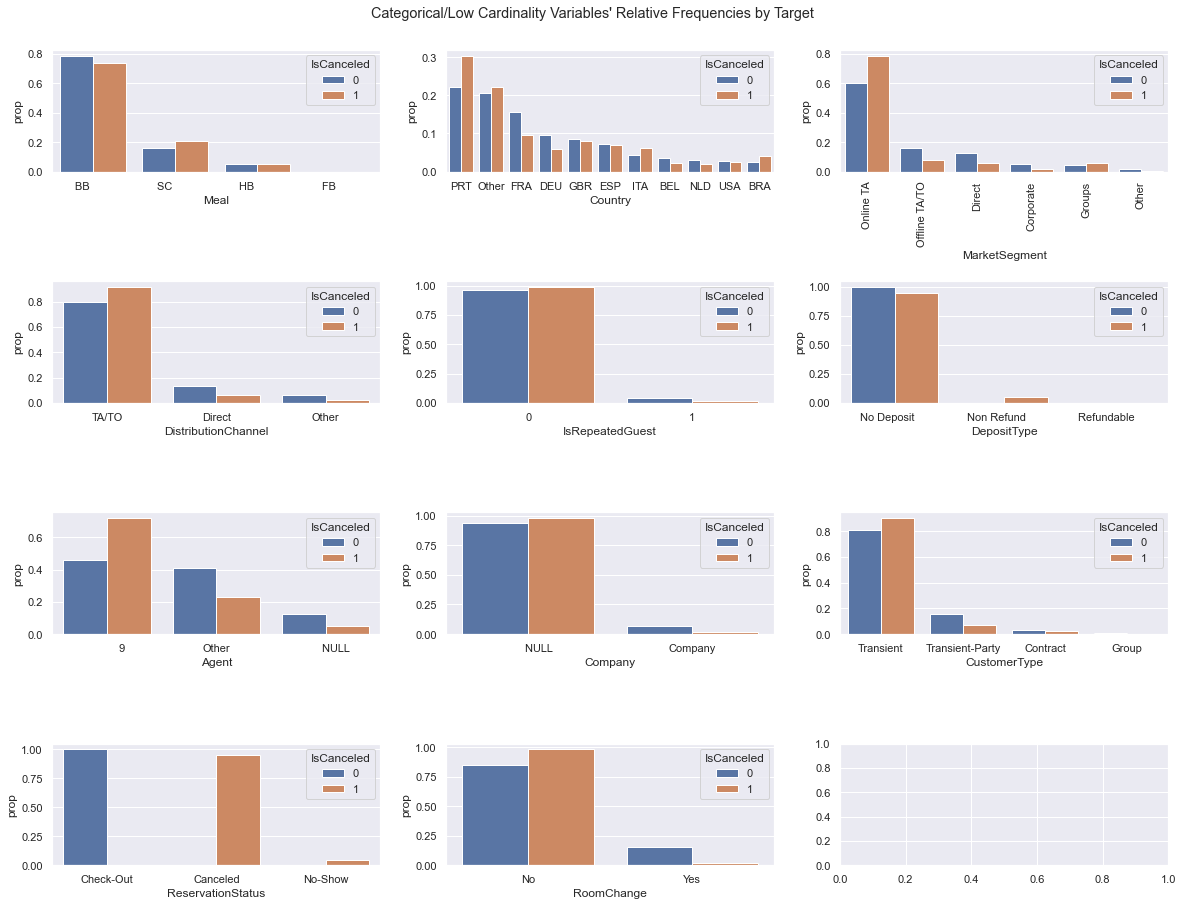

In [110]:
# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(4,3, figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), cat):
    data1 = bookings2.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data1, x=feat, y='prop', hue='IsCanceled', ax=ax)
    sns.move_legend(ax, "upper right")

title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title, x = 0.5, y = 0.92)
# Rotating X-axis labels
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.2, hspace=0.9)

plt.show()

## Scaling and Encoding <a name="scalingencoding"></a>

In [111]:
num

['LeadTime',
 'ArrivalDateYear',
 'ArrivalDateMonthNumber',
 'ArrivalDateDayOfMonth',
 'ArrivalDateWeekNumber',
 'Adults',
 'StaysInWeekendNights',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'StaysInWeekNights',
 'BookingChanges',
 'DaysInWaitingList',
 'TotalOfSpecialRequests',
 'RequiredCarParkingSpaces',
 'ADR',
 'Kids']

In [112]:
remove_num = ['ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'ArrivalDateMonthNumber']

for x in remove_num: 
    num.remove(x)
    
    
cat.remove('ReservationStatus') #we need to remove this variable, because it can influence the model's performance

In [113]:
# One hot encode categorical features

bookings3 = bookings2.copy() 

#selecting non high cardinality variables to encode
ohc_features = cat.copy()
ohc = OneHotEncoder(sparse=False)
df_ohc = pd.DataFrame(ohc.fit_transform(bookings3[ohc_features]),
                      index=bookings3.index,
                columns=ohc.get_feature_names(ohc_features))


scaler = MinMaxScaler().fit(bookings2[num]) 

# scale num features
bookings3 = pd.DataFrame(scaler.transform(bookings3[num]) , columns=bookings3[num].columns).set_index(bookings3[num].index) 
bookings3 = pd.concat([bookings3[num], df_ohc, bookings2['IsCanceled']], axis=1)
bookings3.head()

C:\Users\andre\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



LeadTime  Adults  StaysInWeekendNights  PreviousCancellations  \
0  0.009539    0.25              0.000000                    0.0   
1  0.139905    0.50              0.000000                    0.0   
2  0.103339    0.25              0.000000                    0.0   
3  0.146264    0.50              0.142857                    0.0   
4  0.158983    0.50              0.000000                    0.0   

   PreviousBookingsNotCanceled  StaysInWeekNights  BookingChanges  \
0                          0.0           0.058824             0.0   
1                          0.0           0.117647             0.0   
2                          0.0           0.117647             0.0   
3                          0.0           0.117647             0.0   
4                          0.0           0.058824             0.0   

   DaysInWaitingList  TotalOfSpecialRequests  RequiredCarParkingSpaces  ...  \
0                0.0                     0.0                       0.0  ...   
1                0.0                     0.2                       0.0  ...   
2                0.0                     0.2                       0.0  ...   
3                0.0                     0.4                       0.0  ...   
4                0.0                     0.2                       0.0  ...   

   Agent_Other  Company_       NULL  Company_Company  CustomerType_Contract  \
0          1.0                  1.0              0.0                    0.0   
1          0.0                  1.0              0.0                    0.0   
2          0.0                  1.0              0.0                    0.0   
3          0.0                  1.0              0.0                    0.0   
4          0.0                  1.0              0.0                    0.0   

   CustomerType_Group  CustomerType_Transient  CustomerType_Transient-Party  \
0                 0.0                     1.0                           0.0   
1                 0.0                     1.0                           0.0   
2                 0.0                     1.0                           0.0   
3                 0.0                     1.0                           0.0   
4                 0.0                     1.0                           0.0   

   RoomChange_No  RoomChange_Yes  IsCanceled  
0            1.0             0.0           0  
1            1.0             0.0           1  
2            1.0             0.0           1  
3            1.0             0.0           1  
4            1.0             0.0           1  

[5 rows x 53 columns]

In [114]:
bookings3.to_csv("bookings3.csv", index=True)

## Final Dataset<a name="finaldataset"></a>

In [115]:
final_dataset = bookings3.copy()

In [116]:
final_dataset['IsCanceled'].value_counts()

0    37237
1    16034
Name: IsCanceled, dtype: int64

In [117]:
(16034 / (37237 + 16034)) #percentage of Cancellations in the total of Bookings

0.30098928122242874

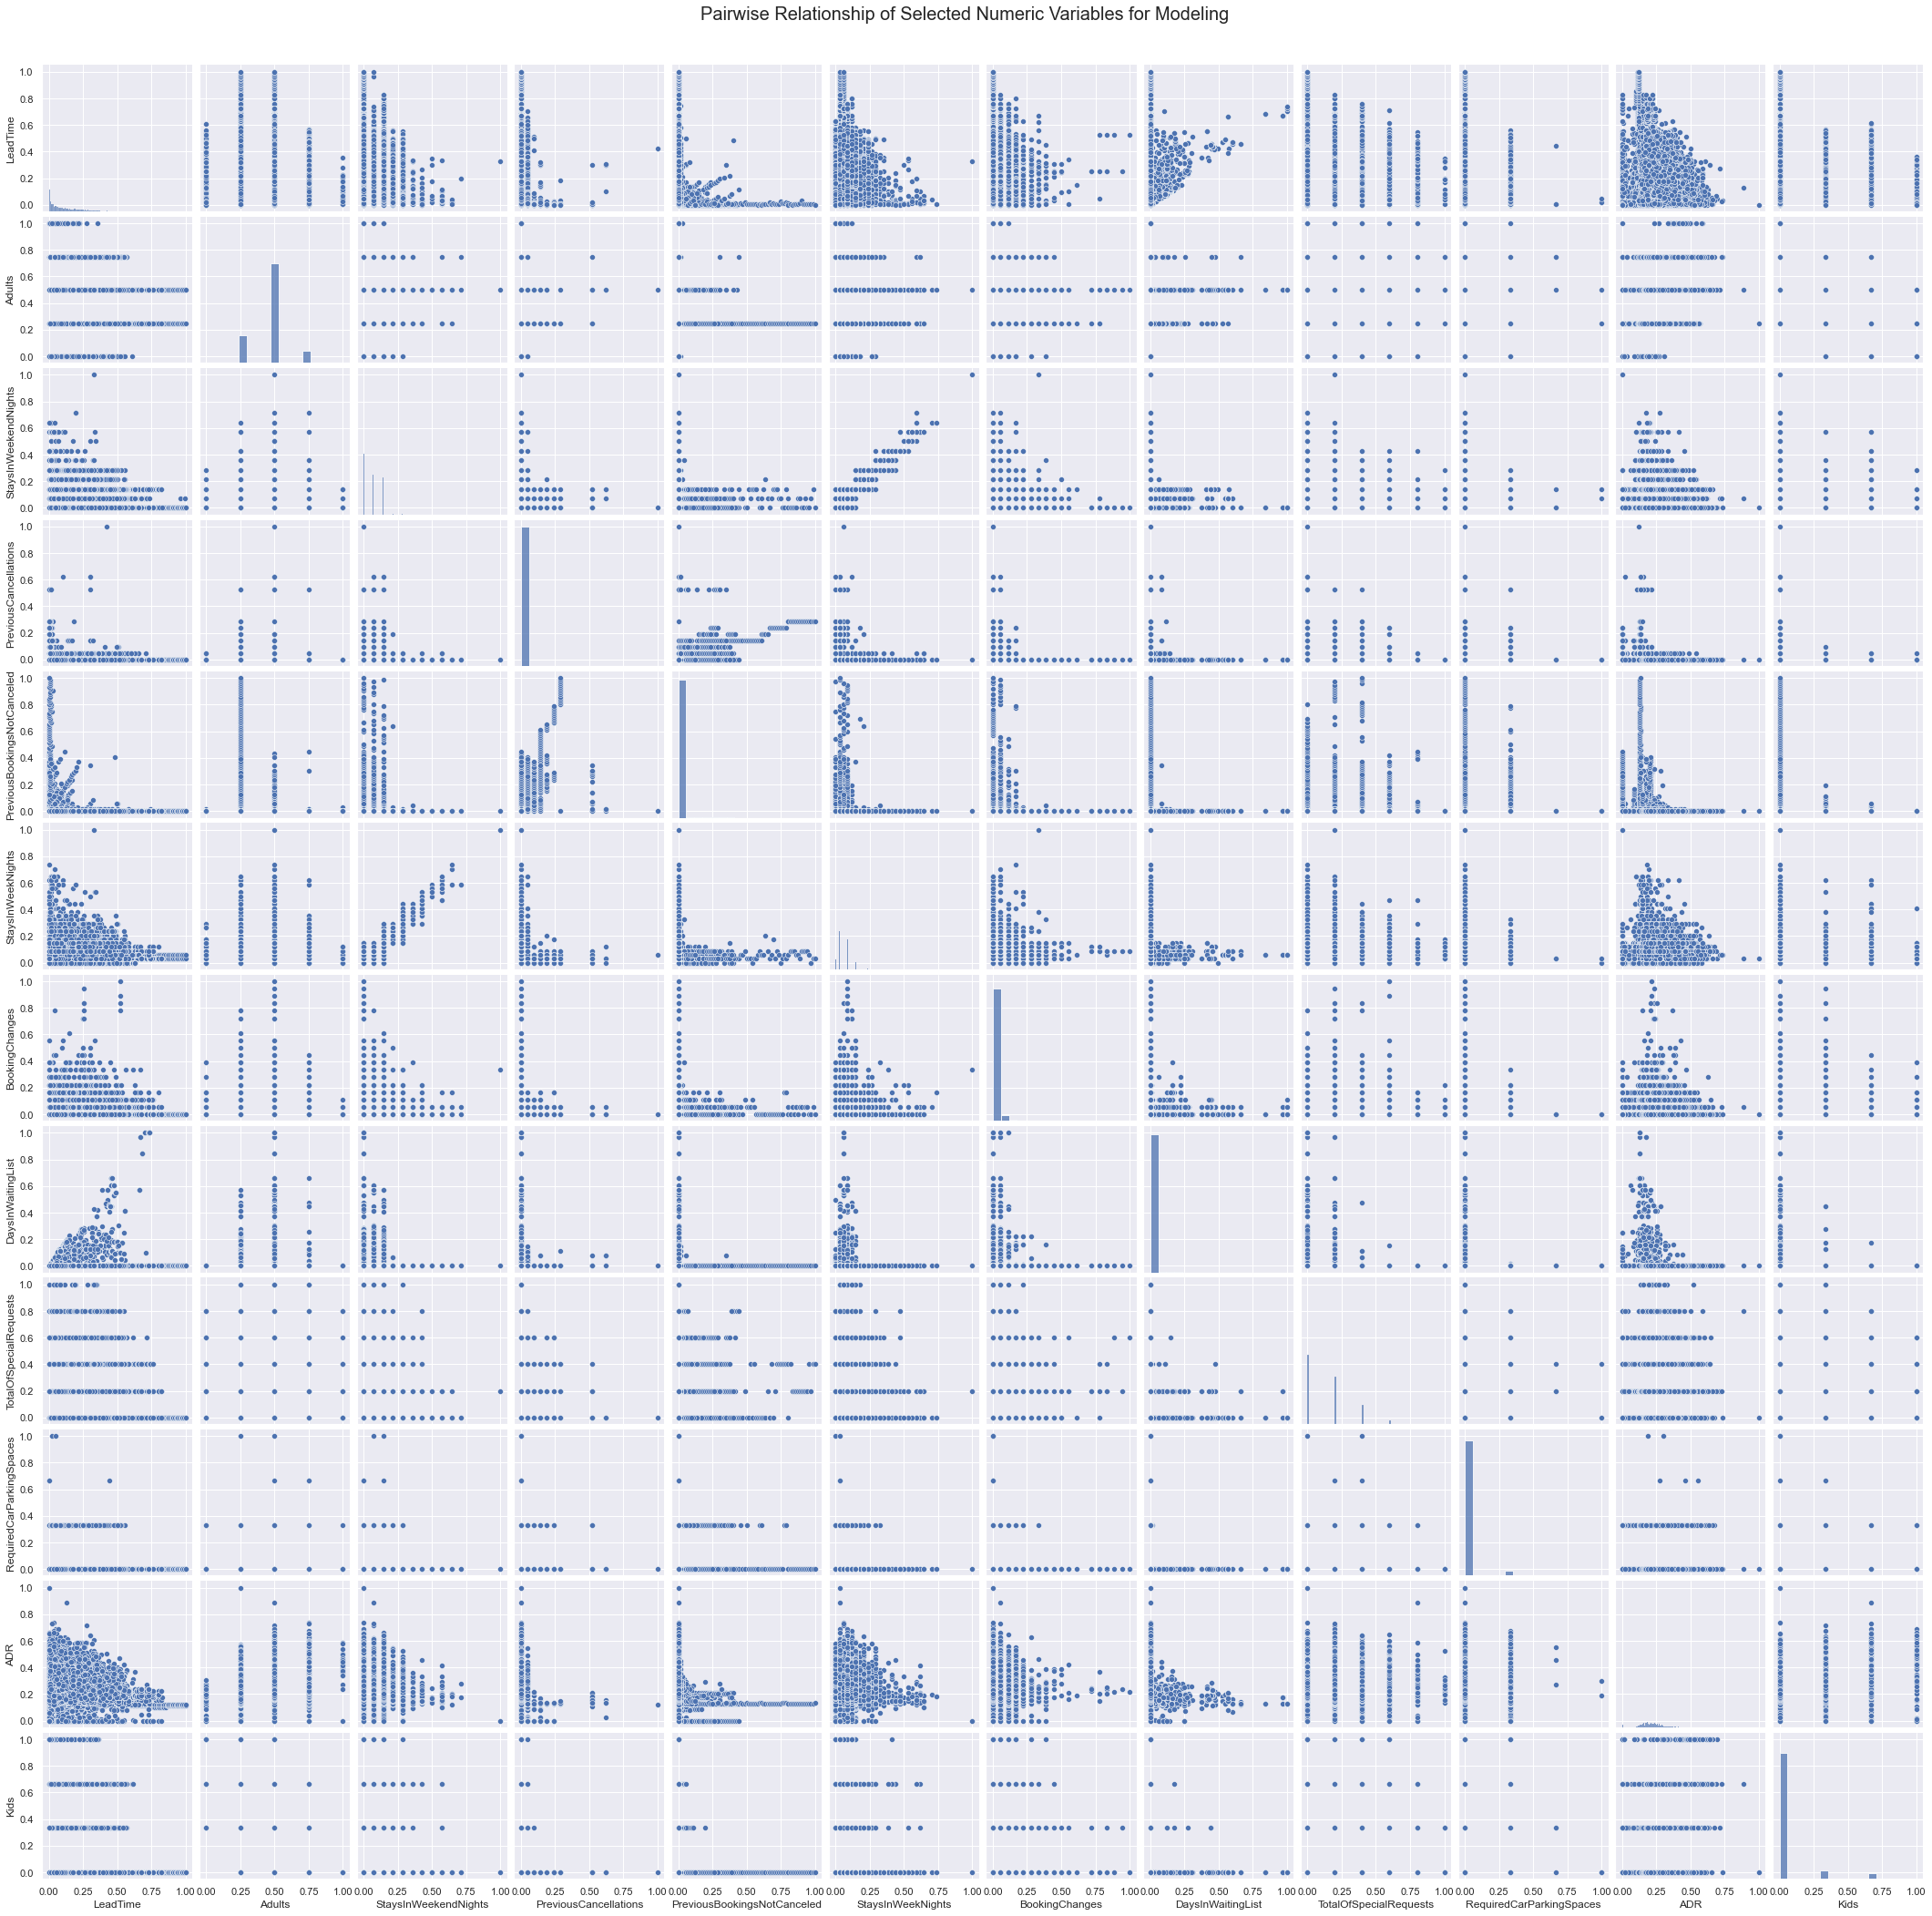

In [118]:
# pairplot of numeric features
sns.pairplot(final_dataset[num], diag_kind="hist") 
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Selected Numeric Variables for Modeling", fontsize=20)
plt.show()

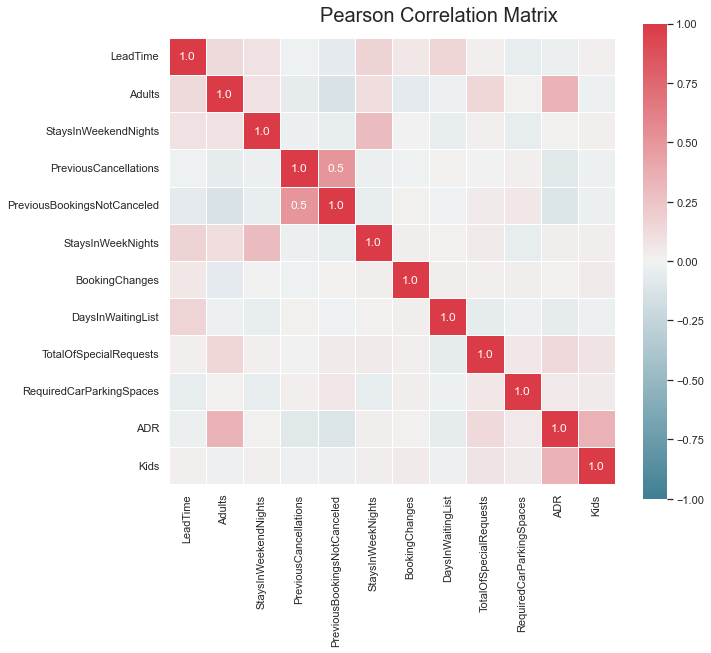

In [119]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(final_dataset[num].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

In [120]:
final_dataset.to_csv('finaldataset.csv', index=True)